

# Project Phase 2: Analyzing and Presenting the Data for The General Insurance Company

### This project is concerned with: 
- Using a purchased data source from Abilitech to identify trends amongst our current customers. 
- Building a model for predicting quote prices.
- Producing a risk score and identifying risky customer groups. 
- Demonstrating the process of exploring the data and trying to build an accurate model using the data made available.


## Section 1: Import the libraries 
   - Bring in the packages that are needed to complete the work. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sci-kit learn packages
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.decomposition import PCA

plt.style.use('ggplot')
%matplotlib inline

## Summary 1
  - In this section, I imported the libraries that are used throughout the project, such as pandas, numpy, matplotlib, seaborn, and sklearn. 
  - There were no errors, but there are other imports from sklearn that are found throughout the workbook. 

## Section 2: Import the data
- Bring the data into the notebook

In [2]:
df_AP3 = pd.read_csv('data/AP03.csv', index_col=None, header=0)
df_TheGeneral = pd.read_csv('data/Phase2_TheGeneral.csv', index_col=None, header=0)
df_ClaimMasterTrans = pd.read_csv('data/Phase2_ClaimMasterTrans.csv', index_col=None, header=0)
df_MasterQuote = pd.read_csv('data/Phase2_MasterQuote.csv', index_col=None, header=0)
df_Demo = pd.read_csv('data/ap_demo.csv', index_col=0, header=0, low_memory=False)

## Summary 2: 
- In this section, I imported the data files that contain the information about the customers, quotes, claims, and demographics. I used the pd.read_csv() function to read the CSV files and store them in pandas dataframes.

## Section 3: Clean the data
- In this section I perform cleaned the data in ordre to prepare for analysis. 

### i. Cleaning df_ClaimMasterTrans

- Cleaned up null values
- Used OneHotEncoder to alter categorical columns into transposed int/float columns. 
- Dropped columns that are not suitable for analysis

In [3]:
df_ClaimMasterTrans['ClaimTransPaidLoss'] = df_ClaimMasterTrans['ClaimTransPaidLoss'].fillna(0)
df_ClaimMasterTrans['ClaimTransCount'] = df_ClaimMasterTrans['ClaimTransCount'].fillna(0)

In [4]:
df_ClaimMasterTrans = df_ClaimMasterTrans.dropna()

### i.a. One Hot Encoding of ClaimMaster Columns 

### AtFaultTransactions

In [5]:
df_ClaimMasterTrans_Cleaned = df_ClaimMasterTrans.drop('Unnamed: 0', axis=1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(sparse_output=False)

In [8]:
df_ClaimMasterTrans_Encoded = encoder.fit_transform(df_ClaimMasterTrans_Cleaned[['AtFaultDescription']])

In [9]:
df_ClaimMasterTrans_Temp = pd.DataFrame(df_ClaimMasterTrans_Encoded, columns=encoder.get_feature_names_out(['AtFaultDescription']))

In [10]:
df_ClaimMasterTrans_Final = pd.concat([df_ClaimMasterTrans_Cleaned.drop('AtFaultDescription', axis=1),df_ClaimMasterTrans_Temp], axis=1)

In [11]:
df_ClaimMasterTrans_Final = df_ClaimMasterTrans_Final.dropna()

### ClaimStatus

In [12]:
input_column = 'ClaimStatus'

In [13]:
df_ClaimMasterTrans_Encoded = encoder.fit_transform(df_ClaimMasterTrans_Final[[input_column]])

In [14]:
df_ClaimMasterTrans_Temp = pd.DataFrame(df_ClaimMasterTrans_Encoded, columns=encoder.get_feature_names_out([input_column]))

In [15]:
df_ClaimMasterTrans_Final = pd.concat([df_ClaimMasterTrans_Final.drop(input_column, axis=1),df_ClaimMasterTrans_Temp], axis=1)

In [16]:
df_ClaimMasterTrans_Final = df_ClaimMasterTrans_Final.dropna()

### ClaimType

In [17]:
input_column = 'ClaimType'

In [18]:
df_ClaimMasterTrans_Encoded = encoder.fit_transform(df_ClaimMasterTrans_Final[[input_column]])

In [19]:
df_ClaimMasterTrans_Temp = pd.DataFrame(df_ClaimMasterTrans_Encoded, columns=encoder.get_feature_names_out([input_column]))

In [20]:
df_ClaimMasterTrans_Final = pd.concat([df_ClaimMasterTrans_Final.drop(input_column, axis=1),df_ClaimMasterTrans_Temp], axis=1)

In [21]:
df_ClaimMasterTrans_Final = df_ClaimMasterTrans_Final.dropna()

### SubrogrationFlag

In [22]:
input_column = 'SubrogrationFlag'

In [23]:
df_ClaimMasterTrans_Encoded = encoder.fit_transform(df_ClaimMasterTrans_Final[[input_column]])

In [24]:
df_ClaimMasterTrans_Temp = pd.DataFrame(df_ClaimMasterTrans_Encoded, columns=encoder.get_feature_names_out([input_column]))

In [25]:
df_ClaimMasterTrans_Final = pd.concat([df_ClaimMasterTrans_Final.drop(input_column, axis=1),df_ClaimMasterTrans_Temp], axis=1)

In [26]:
df_ClaimMasterTrans_Final = df_ClaimMasterTrans_Final.dropna()

### i.b. Drop Columns that won't be analyzed

In [27]:
df_ClaimMasterTrans_Final = df_ClaimMasterTrans_Final.drop(['DateOfLoss', 'DriverID','LossState','PolicyStateCode','TermEffectiveDate','VehicleID'], axis=1)

In [28]:
df_ClaimMasterTrans_Final

,ClaimNumber,PolicyNumber,ClaimTransPaidLoss,ClaimTransCount,DaysToClaim,DaysToClaim_h,AtFaultDescription_Comparative Negligence,AtFaultDescription_Fault unknown,AtFaultDescription_Insured at fault,AtFaultDescription_No fault,...,ClaimType_THEFT/FIRE,ClaimType_THEFTENTIRE,ClaimType_THEFTPARTS,ClaimType_TRAINBUSCOLL,ClaimType_UNVERIFIED,ClaimType_UNVERIFIED W/INJURY,ClaimType_VANDALISM,ClaimType_VEHCOLLISION,SubrogrationFlag_NO,SubrogrationFlag_YES
0,PA0002364104,Q080MDE1MTY2,5086.61,9.0,69.000000,1656.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,PA0002344011,Q080MDExOTIz,21397.74,53.0,23.000000,552.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,PA0002348918,Q080MDIyMDcw,0.00,14.0,18.000000,432.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,PA0002348997,Q080MDIyMDcw,0.00,1.0,29.000000,696.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,PA0002422485,Q080MDIyMDcw,0.00,8.0,237.000000,5688.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,PA0000791004,VkExNjE2Mjcy,3892.08,10.0,334.166667,8020.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10400,PA0000830997,VkExNjE2Mjcy,15136.14,18.0,170.583333,4094.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10401,PA0000785006,VkExNjIwMTkx,0.00,3.0,131.416667,3154.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10402,PA0002130320,VkExNjIwMTkx,0.00,1.0,76.000000,1824.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### ii. Cleaning MasterQuote
    - Cleaned up null values by filling in nulls and adding a column called 'GotPolicy' which flags the quote row if they did or did not get a policy associated with the quote. 

In [29]:
df_MasterQuote['PolicyNumber'].fillna('NoPolicy', inplace=True)

In [30]:
# Dataframe of policy vs no policy
def gotPolicy(PolicyNumber):
    if PolicyNumber == 'NoPolicy':
            return 0
    else:
        return 1

In [31]:
df_MasterQuote.loc[:,'GotPolicy'] = df_MasterQuote['PolicyNumber'].apply(gotPolicy)

### iii. Cleaning df_Demo

- Setting categorical values to integer values to incorporate into analysis

In [32]:
# Class the columns with string values to integers
df_Demo['Age_Cat'] = df_Demo['Age_Cat'].map({'Above Mean': 1, 'Below Mean': 0})
df_Demo['Income_Cat'] = df_Demo['Income_Cat'].map({'Low Income': 0, 'High Income': 1})
df_Demo['Household_Cat'] = df_Demo['Household_Cat'].map({'1': 1, '2': 2,'3':3, '4':4, '5 or more':5})

### Clean Abilitech Data

- Dropping null values from the dataframe

In [33]:
# Drop null values
df_AP3 = df_AP3.dropna()

In [34]:
df_AP3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81866 entries, 1 to 96500
Columns: 243 entries, AbilitecContactID to AP004163_Own_a_PlayStation_V2_rank_base_20_RBGM4824
dtypes: float64(233), int64(9), object(1)
memory usage: 152.4+ MB


## Section 4: Exploring the Data

### Split Abilitech into Lists

- The idea of this section is to uncover and form groupings of columns that are available in the Abilitech 3 data file. 

In [35]:
# Save ID's for rows before splitting
df_AP3_ID = df_AP3['AbilitecContactID']

In [36]:
# Get column names
df_AP3_columns = df_AP3.columns.values
df_AP3_columns = pd.DataFrame(df_AP3_columns)
df_AP3_columns = df_AP3_columns.rename(columns = {0: 'ColumnName'})


In [37]:
retailers_group = "Athletic_Shoe_Store|Discount_Mass_Merchant|Department_Store|Apparel_Specialty|National_Chain|Online_Pureplay|Shoe_Store|Walmart|Macy's|Shoe_Carnival|Sears|Shoe_Department|Ross_Dress_For_Less|Dicks_Sporting_Goods|Marshalls|Academy_Sports|Big_5|Payless|Finish_Line|The_Sports_Authority|Nike_Outlet|Skechers_Store|Dillards|Zappos_com|Lady_Footlocker|Rack_Room|T_J_Maxx|eBay|Kohls|Nordstrom|Journeys|Burlington_Coat_Factory|Amazon|Belk|Meijer|New_Balance_Outlet|Target|Adidas_Outlet|Shoebuy_com|Avon|AAFES|Kids_Footlocker|Vans|Reebok_Outlet|American_Eagle_Outfitters|Dollar_General|Shopko|Lands_End|Easy_Spirit|Shoes_com|Nordstrom_Rack|Eastbay|Nine_West|Bobs_Stores|Famous_Footwear|Bass_Pro_Shop|Footaction|QVC|Hibbetts|L_L_Bean|The_Athlete's_Foot|G_H_Bass|Fashion_Bug|Cabelas|DSW|Sam's_Club|Charlotte_Russe|Timberland|Kmart|Foot_Locker"

In [38]:
# Lists of interesting columns 
# includes: Footwear, Videos, Dining, Family, Athletic columns
df_AP3_Summary = df_AP3
df_AP3_Footwear_Retailers = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains(retailers_group, case=False, na=False)]
df_AP3_Footwear = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Footwear")]
df_AP3_Videos = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Videos")]
df_AP3_Dining = df_AP3_columns[df_AP3_columns['ColumnName'].str.contains("Dine|Dining|Consumption")]


In [39]:
#Columns in new Lists
var_AP3_Retail = df_AP3_Footwear_Retailers['ColumnName']
var_AP3_Footwear = df_AP3_Footwear['ColumnName']
var_AP3_Videos = df_AP3_Videos['ColumnName']
var_AP3_Dining = df_AP3_Dining['ColumnName']


In [40]:
# Create new DataFrames from Abilitech Data
df_AP3_Retail_Final = df_AP3[var_AP3_Retail]
df_AP3_Footwear_Final = df_AP3[var_AP3_Footwear]
df_AP3_Videos_Final = df_AP3[var_AP3_Videos]
df_AP3_Dining_Final = df_AP3[var_AP3_Dining]


### Summary of List Creation

- In this section I divided the Abilitech Data into 6 subsections. 
- This data is concerned with consumer behavior in: 
    - Purchasing Footwear (116 Columns)
        - Divided out into 79 retailer columns in df_AP3_Retail_Final
    - Video Streaming (52 Columns)
    - Dining (64 Columns)



###############################################################################
### Cluster Analysis of Footwear Retailers 


- This section of code is concerned with exploring the potential data groups that 
###############################################################################

In [41]:
df_AP3_Retail_Final = df_AP3_Retail_Final.dropna()

In [42]:
analyzed_feature = "Retailers"
initial_dataframe = df_AP3_Retail_Final

In [43]:
# scaler function in new df_AP3_Footwear_Final 
scaler = StandardScaler()
scaler.fit(initial_dataframe)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_dataframe = scaler.transform(initial_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=initial_dataframe.columns)

### Determine ideal cluster size for df_AP3_Retailer_Footwear from intertia model

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done


<function matplotlib.pyplot.show(close=None, block=None)>

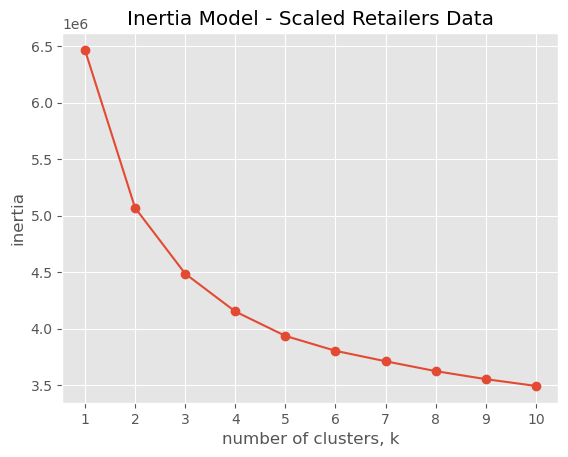

In [44]:

#### Run once to understand the ideal k for kmeans
ks = range(1,11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(scaled_dataframe)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title(f"Inertia Model - Scaled {analyzed_feature} Data")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show


In [45]:
# Create and model the clusters
model = KMeans(n_clusters=5, n_init=10, random_state=42)
model.fit(scaled_dataframe)
# Put the predicted clusters in labels3raw dataframe
labels = model.predict(scaled_dataframe)
# concat labels5scaled and df_AP3_Footwear_Scaled into a new dataframe named results
labels = pd.DataFrame(labels)
labels = labels.rename(columns = {0: 'labels'})
results = pd.concat([initial_dataframe, labels], axis=1, join='inner')

In [46]:
# Identifies the centers of each cluster and the 5 most relevant column scores
centers = model.cluster_centers_
print(f"Top Features of {analyzed_feature} Clusters in Abilitech Data")
for i, center in enumerate(centers):
    print(f"Cluster {i}")
    
    # Adjust the number to select top N features
    for feature in np.argsort(-center)[:5]:  
        #print(f"Feature {feature} with value {center[feature]}")
        text = f"Feature Name: {initial_dataframe.columns[feature]}"
        #part = text.split("_V2")[0]
        #start_index = part.find("Purchase")
        #result = part[start_index:]
        feature_value = f"{text}: {round(center[feature], 3)}"
        print(feature_value)
    print('\n')
        


Top Features of Retailers Clusters in Abilitech Data
Cluster 0
Feature Name: AP003939_Purchase_Footwear_from_Kmart_V2_rank_base_20_RBGM5096: 0.92
Feature Name: AP003905_Purchase_Footwear_from_Meijer_V2_rank_base_20_RBGM5057: 0.865
Feature Name: AP003916_Purchase_Footwear_from_Dollar_General_V2_rank_base_20_RBGM5070: 0.686
Feature Name: AP003917_Purchase_Footwear_from_Shopko_V2_rank_base_20_RBGM5071: 0.668
Feature Name: AP003879_Purchase_Footwear_from_Shoe_Carnival_V2_rank_base_20_RBGM5029: 0.641


Cluster 1
Feature Name: AP003926_Purchase_Footwear_from_Bass_Pro_Shop_V2_rank_base_20_RBGM5082: 0.708
Feature Name: AP003921_Purchase_Footwear_from_Nordstrom_Rack_V2_rank_base_20_RBGM5076: 0.661
Feature Name: AP003935_Purchase_Footwear_from_DSW_V2_rank_base_20_RBGM5092: 0.629
Feature Name: AP003900_Purchase_Footwear_from_Nordstrom_V2_rank_base_20_RBGM5050: 0.624
Feature Name: AP003884_Purchase_Footwear_from_Marshalls_V2_rank_base_20_RBGM5034: 0.566


Cluster 2
Feature Name: AP003827_Influence

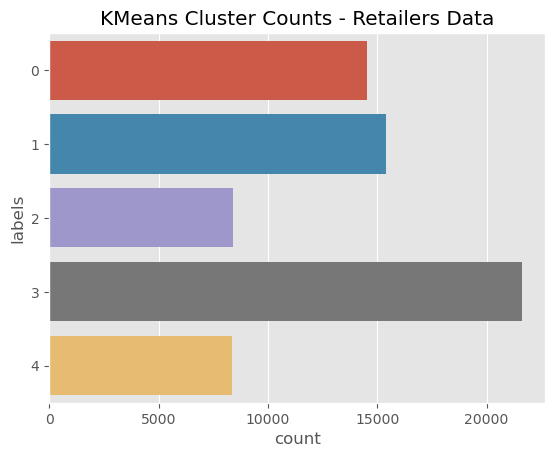

In [47]:
# Create a countplot for results of the raw and scaled data predictions 
sns.countplot(y="labels", data = results)
plt.title(f"KMeans Cluster Counts - {analyzed_feature} Data")
plt.show()

### Analysis of Retailer Clusters Top Features
- **<span style="color:red">Cluster 0 - Value Shoppers</span>** (3)
    - Affinity for finding affordable options for footwear
- **<span style="color:blue">Cluster 1 - Mid-to-High End Shopping**</span> (2)
    - Outdoor and sporting goods, combined with fashion retailers
- **<span style="color:purple">Cluster 2 - Style - Athletic Shopping**</span> (4)
    - Athletic "Cool" stylish customers
- **<span style="color:black">Cluster 3 - Specialty and Comfort Driven Shoppers**</span> (1)
    - Largest group, likes particular brands / stores
- **<span style="color:orange">Cluster 4 - One Stop Shoppers**</span> (5)
    - Walmart / Dollar General shoppers that buy everything from videos to shoes at Walmart. 

### Clusters of Retailers

In [48]:
resulting_dataframe = pd.concat([df_AP3_ID, results], axis=1, join='inner')
labels_summary = labels.rename(columns = {'labels': f"{analyzed_feature}_labels"})
label_name = f"{analyzed_feature}_labels"
df_AP3_Summary = df_AP3
df_AP3_Summary = pd.concat([df_AP3_Summary, labels_summary], axis=1, join='inner')

## Analyze the relationship between the Retailers clusters, demographics, and policy decisions

### Analyzing Demographics and Retailers

In [49]:
# Merge the df_AP3_Footwear_Clusters with Demographic data in df_Demo
df_Abilitech_Demographics = pd.merge(resulting_dataframe, df_Demo, left_on='AbilitecContactID',right_on='APID',how='left')
df_Abilitech_Demographics = pd.DataFrame(df_Abilitech_Demographics)

In [50]:
avg_Income_Clusters = df_Abilitech_Demographics.groupby('labels')['Income_Dollars'].mean().reset_index(name='AvgIncome')
df_clusters = pd.DataFrame(avg_Income_Clusters)

In [51]:
avg_age = df_Abilitech_Demographics.groupby('labels')['Age'].mean().reset_index(name='AvgAge')
df_clusters = pd.merge(df_clusters, avg_age, on='labels',how='left')

In [52]:
avg_discretionary = df_Abilitech_Demographics.groupby('labels')['Discretionary_Spending_Dollars'].mean().reset_index(name='AvgDI')
df_clusters = pd.merge(df_clusters, avg_discretionary, on='labels',how='left')

In [53]:
avg_Marital = df_Abilitech_Demographics.groupby('labels')['Married'].mean().reset_index(name='AvgMS')
df_clusters = pd.merge(df_clusters, avg_Marital, on='labels',how='left')

In [54]:
avg_Household = df_Abilitech_Demographics.groupby('labels')['Househoold_Size'].mean().reset_index(name='AvgHousehold')
df_clusters = pd.merge(df_clusters, avg_Household, on='labels',how='left')


In [55]:
avg_homeowner = df_Abilitech_Demographics.groupby('labels')['Homeowner'].mean().reset_index(name='AvgHomeowner')
df_clusters = pd.merge(df_clusters, avg_homeowner, on='labels',how='left')

In [56]:
df_clusters

,labels,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner
0,0,57718.571527,46.203262,8441.835615,0.286933,2.453451,0.488130
1,1,57943.337444,46.553125,8431.799701,0.297527,2.483092,0.503408
2,2,56804.084540,46.968535,8190.066136,0.300641,2.503918,0.513536
3,3,56649.627263,45.807751,8262.618512,0.284438,2.450016,0.490114
4,4,56844.048757,46.893164,8145.920292,0.293260,2.487333,0.500717


### Summary of Footwear Retailers Demographics
- This analysis did not render any meaningful insights. Only that the retailers that shoe shoppers choose don't necessarily fall along income or housing lines.  

### Looking at the relationship between policies and retailers clusters

In [57]:
df_AP3_Retailers_Policy = pd.merge(df_AP3_Summary, df_MasterQuote, on='AbilitecContactID', how='left')
#df_AP3_Retailers_Policy = df_AP3_Retailers_Policy.dropna()
df_AP3_Retailers_Policy = df_AP3_Retailers_Policy.drop(['ACX_ZIPCODE','ACX_ZIP4'],axis=1)

In [58]:
df_AP3_Retailers_Policy = df_AP3_Retailers_Policy.dropna()

In [59]:
val = df_AP3_Retailers_Policy.groupby(label_name)['GotPolicy'].sum().reset_index(name='PolicyCount')
df_clusters_policy = pd.DataFrame(val)

In [60]:
val = df_AP3_Retailers_Policy.groupby(label_name)['MQuotedTotalPayment'].mean().reset_index(name='AvgQuotedPayment')
df_clusters_policy = pd.merge(df_clusters_policy, val, on=label_name,how='left')

In [61]:
val = df_AP3_Retailers_Policy.groupby(label_name)['DriverCount'].mean().reset_index(name='AvgDriverCount')
df_clusters_policy = pd.merge(df_clusters_policy, val, on=label_name,how='left')

In [62]:
val = df_AP3_Retailers_Policy.groupby(label_name)['NamedInsuredDriverPoints'].mean().reset_index(name='AvgDriverPoints')
df_clusters_policy = pd.merge(df_clusters_policy, val, on=label_name,how='left')

In [63]:
df_clusters_policy = pd.merge(df_clusters_policy, df_clusters, left_on=label_name, right_on='labels', how='left')
df_clusters_policy =df_clusters_policy.drop('labels', axis=1)

In [64]:
df_clusters_policy

,Retailers_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner
0,0,3251.0,1577.630339,1.781912,1.396390,57718.571527,46.203262,8441.835615,0.286933,2.453451,0.488130
1,1,3478.0,1572.684749,1.778694,1.450515,57943.337444,46.553125,8431.799701,0.297527,2.483092,0.503408
2,2,1924.0,1556.598140,1.835283,1.315887,56804.084540,46.968535,8190.066136,0.300641,2.503918,0.513536
3,3,4964.0,1553.863633,1.758476,1.404143,56649.627263,45.807751,8262.618512,0.284438,2.450016,0.490114
4,4,1868.0,1591.603244,1.794389,1.414851,56844.048757,46.893164,8145.920292,0.293260,2.487333,0.500717


### Look at the relationship between claims filed and clusters

In [65]:
df_AP3_Retailers_Policy = df_AP3_Retailers_Policy.dropna()

In [66]:
###Change here
initial_claim_group = df_AP3_Retailers_Policy
label_name = 'Retailers_labels'

In [67]:
initial_claim_group = initial_claim_group.dropna()

In [68]:
df_AP3_Claims = pd.merge(initial_claim_group, df_ClaimMasterTrans_Final, on='PolicyNumber',how='left')

In [69]:
df_AP3_Claims = df_AP3_Claims.dropna()

In [70]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].sum().reset_index(name='ClaimTotal')
df_clusters_claims = pd.merge(df_clusters_policy, val, on=label_name,how='left')

In [71]:
val = df_AP3_Claims.groupby(label_name)['ClaimNumber'].count().reset_index(name='ClaimCount')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [72]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].mean().reset_index(name='AvgClaimAmnt')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [73]:
df_clusters_claims['ClaimToPolicy'] = round((df_clusters_claims['ClaimCount']/df_clusters_claims['PolicyCount']), 2)

In [74]:
val = df_AP3_Claims.groupby(label_name)['DaysToClaim'].mean().reset_index(name='AvgDaysToClaim')
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [75]:
df_clusters_claims['AvgPolicyProfit'] = (df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment']

In [76]:
df_clusters_claims['TotalPolicyProfits'] = round(((df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment'])*df_clusters_claims['PolicyCount'],2)

### Analyzing the Relationship of Retail Clusters to Claims 

In [77]:
df_clusters_claims

,Retailers_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner,ClaimTotal,ClaimCount,AvgClaimAmnt,ClaimToPolicy,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,3251.0,1577.630339,1.781912,1.396390,57718.571527,46.203262,8441.835615,0.286933,2.453451,0.488130,3078494.21,846,3638.88,0.26,132.911348,2628.385891,8544882.53
1,1,3478.0,1572.684749,1.778694,1.450515,57943.337444,46.553125,8431.799701,0.297527,2.483092,0.503408,3259776.67,845,3857.72,0.24,131.294675,2638.913052,9178139.59
2,2,1924.0,1556.598140,1.835283,1.315887,56804.084540,46.968535,8190.066136,0.300641,2.503918,0.513536,1517157.74,422,3595.16,0.22,130.381517,3072.750834,5911972.60
3,3,4964.0,1553.863633,1.758476,1.404143,56649.627263,45.807751,8262.618512,0.284438,2.450016,0.490114,4700585.64,1207,3894.44,0.24,132.230323,2549.797016,12657192.39
4,4,1868.0,1591.603244,1.794389,1.414851,56844.048757,46.893164,8145.920292,0.293260,2.487333,0.500717,1995745.50,499,3999.49,0.27,133.595190,2371.053452,4429127.85


## Basic Comparisons

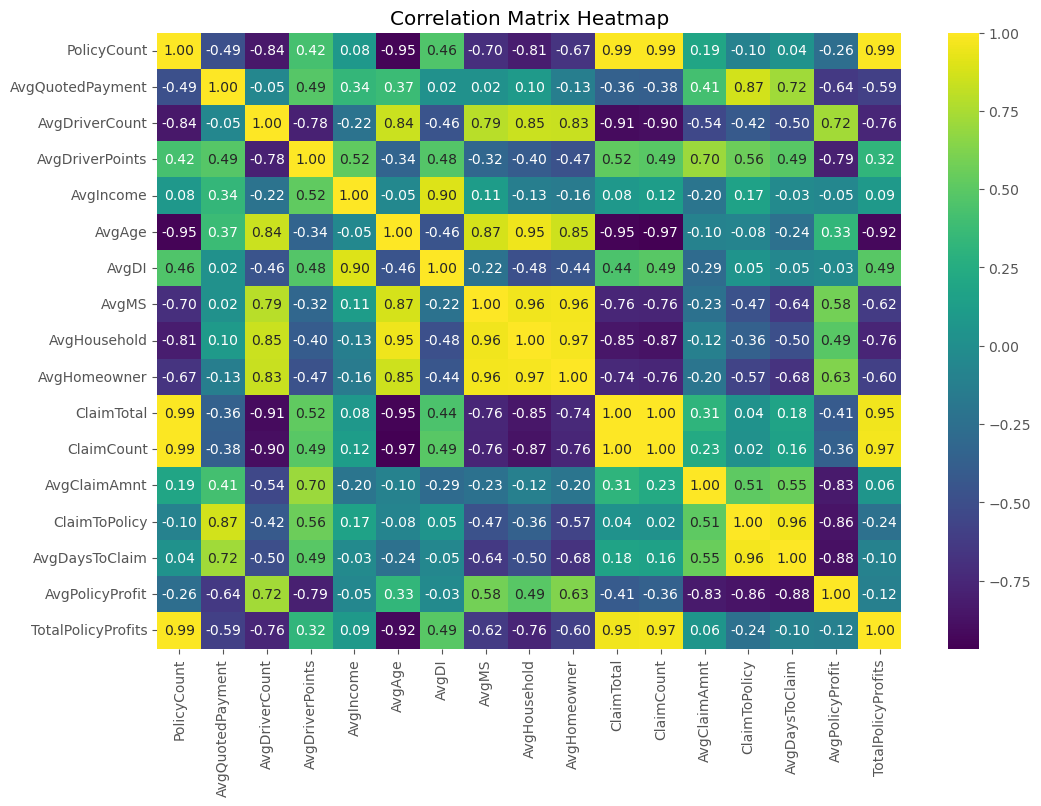

In [78]:
corr_matrix_clusters = df_clusters_claims.drop(['Retailers_labels'], axis=1)
corr_matrix = corr_matrix_clusters.corr()  # Compute the correlation matrix for your DataFrame

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

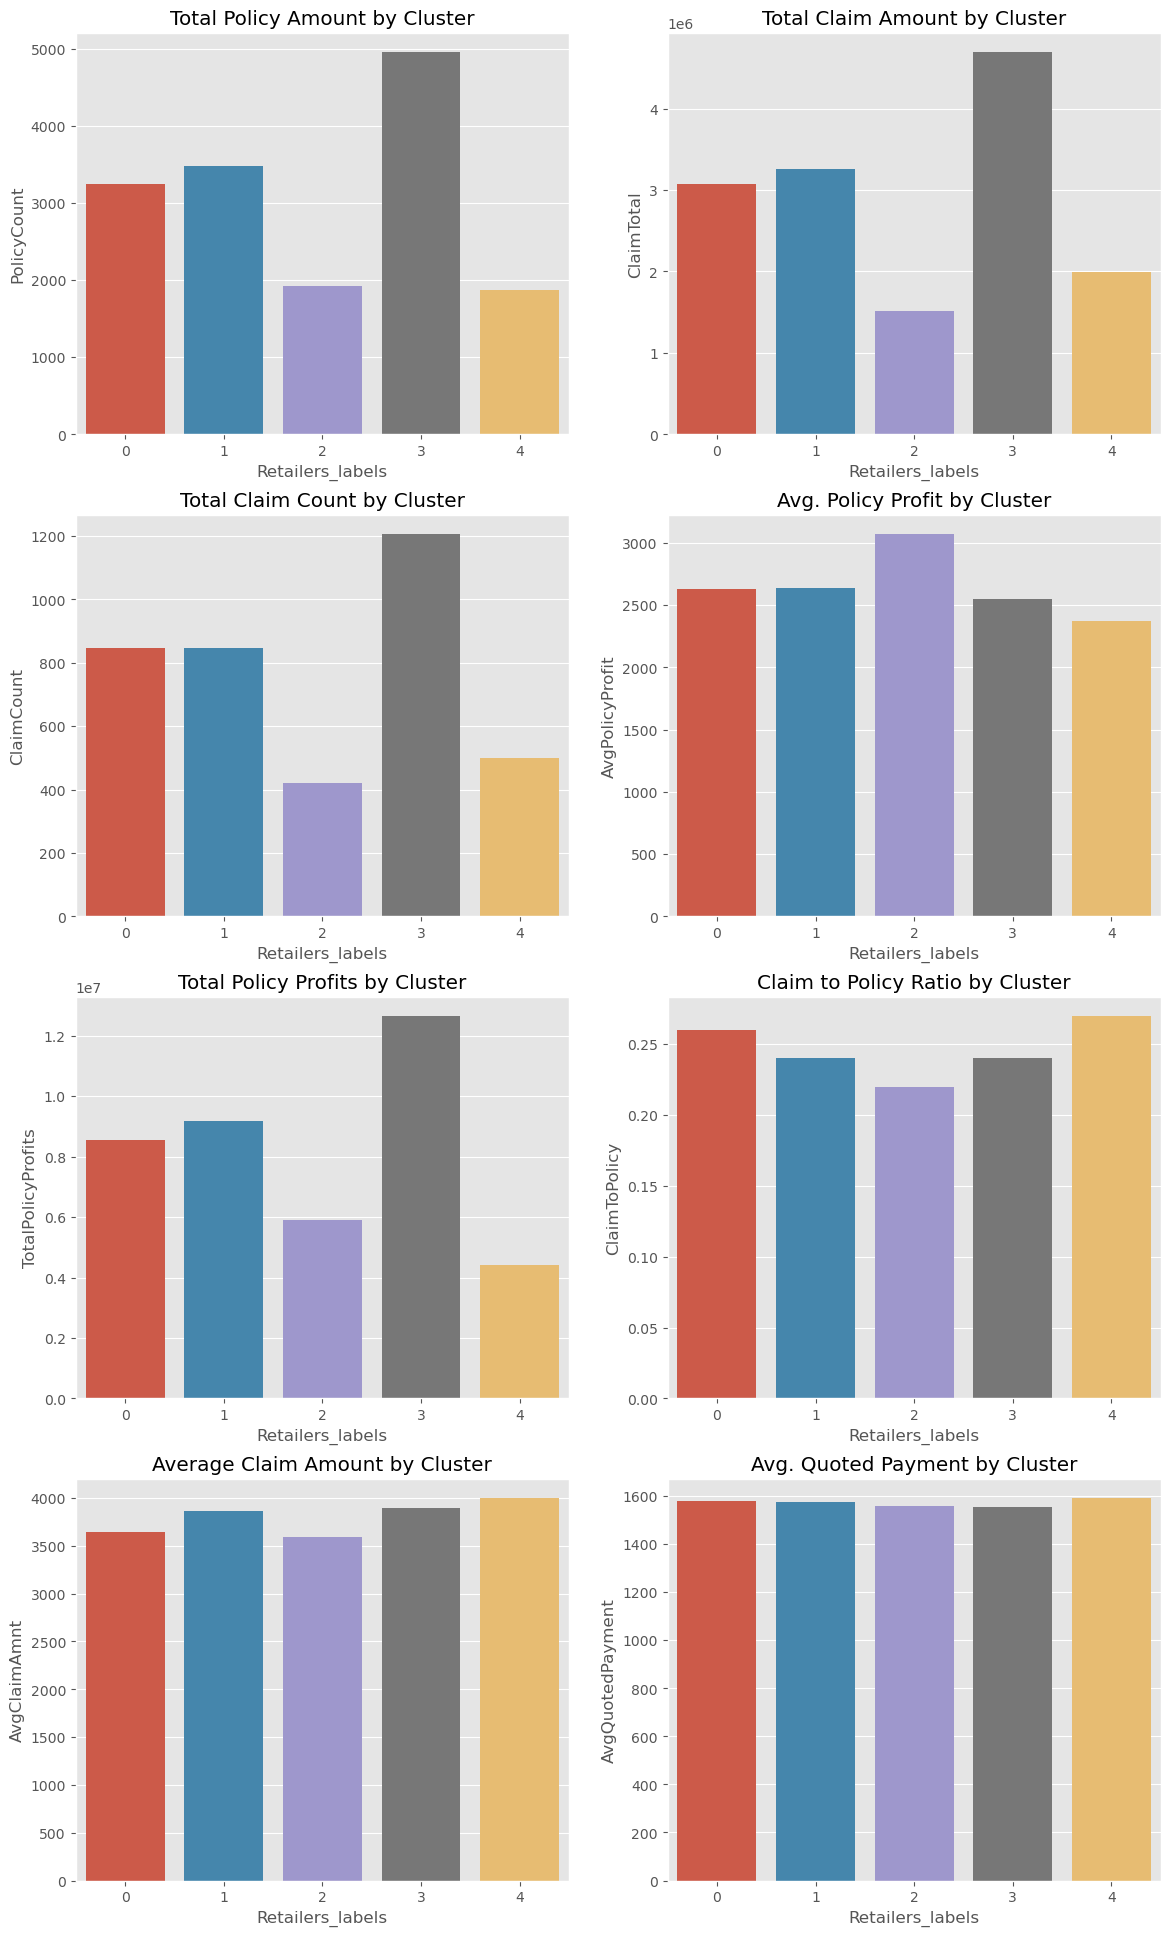

In [79]:
fig, axs = plt.subplots(4,2, figsize=(14,24))
sns.barplot(x=label_name, y='PolicyCount', ax=axs[0,0], data = df_clusters_claims)
axs[0,0].set_title('Total Policy Amount by Cluster')

sns.barplot(x=label_name, y='ClaimTotal', ax=axs[0,1], data = df_clusters_claims)
axs[0,1].set_title('Total Claim Amount by Cluster')

sns.barplot(x=label_name, y='ClaimCount', ax=axs[1,0], data = df_clusters_claims)
axs[1,0].set_title('Total Claim Count by Cluster')

sns.barplot(x=label_name, y='AvgPolicyProfit', ax=axs[1,1], data = df_clusters_claims)
axs[1,1].set_title('Avg. Policy Profit by Cluster')

sns.barplot(x=label_name, y='TotalPolicyProfits', ax=axs[2,0], data = df_clusters_claims)
axs[2,0].set_title('Total Policy Profits by Cluster')

sns.barplot(x=label_name, y='ClaimToPolicy', ax=axs[2,1], data = df_clusters_claims)
axs[2,1].set_title('Claim to Policy Ratio by Cluster')

sns.barplot(x=label_name, y='AvgClaimAmnt', ax=axs[3,0], data = df_clusters_claims)
axs[3,0].set_title('Average Claim Amount by Cluster')

sns.barplot(x=label_name, y='AvgQuotedPayment', ax=axs[3,1], data = df_clusters_claims)
axs[3,1].set_title('Avg. Quoted Payment by Cluster')

plt.show() 

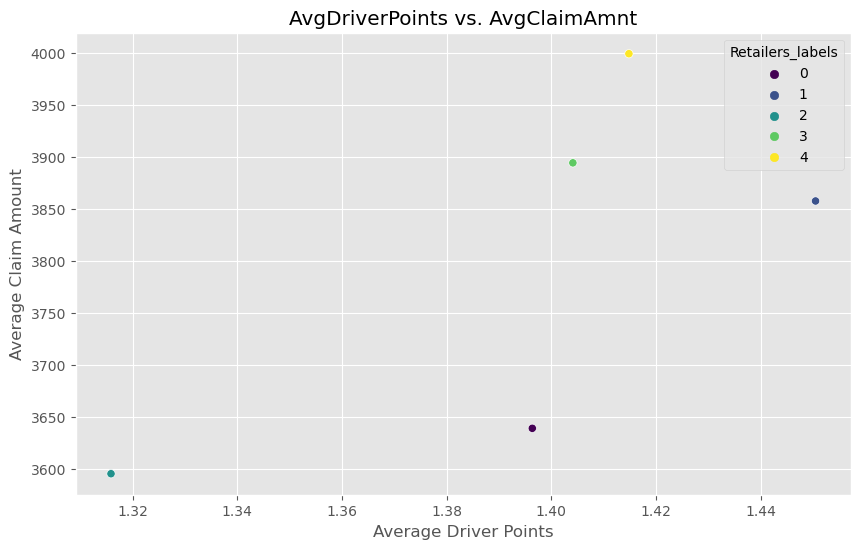

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters_claims, x='AvgDriverPoints', y='AvgClaimAmnt', hue='Retailers_labels', palette='viridis')
plt.title('AvgDriverPoints vs. AvgClaimAmnt')
plt.xlabel('Average Driver Points')
plt.ylabel('Average Claim Amount')
plt.show()

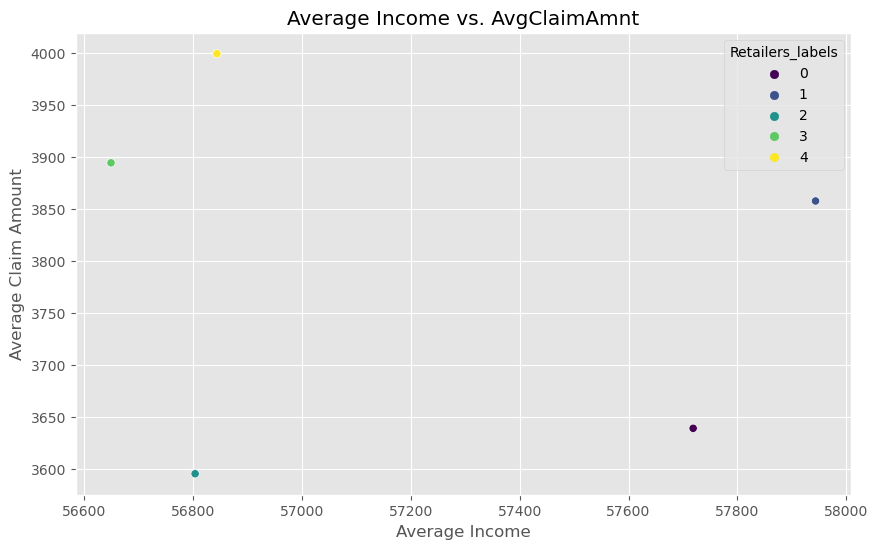

In [81]:
 plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters_claims, x='AvgIncome', y='AvgClaimAmnt', hue='Retailers_labels', palette='viridis')
plt.title('Average Income vs. AvgClaimAmnt')
plt.xlabel('Average Income')
plt.ylabel('Average Claim Amount')
plt.show()

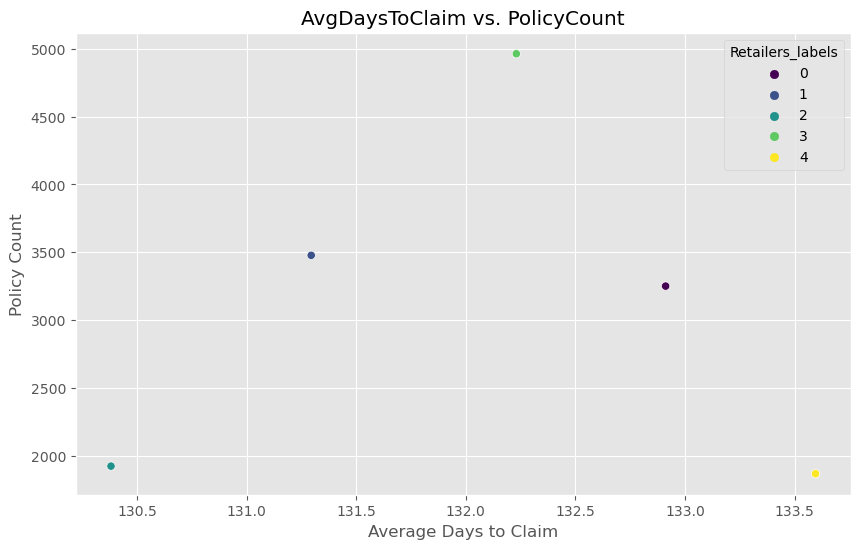

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters_claims, x='AvgDaysToClaim', y='PolicyCount', hue='Retailers_labels', palette='viridis')
plt.title('AvgDaysToClaim vs. PolicyCount')
plt.xlabel('Average Days to Claim')
plt.ylabel('Policy Count')
plt.show()

### Analyzing the Retailer Clusters

In [83]:
df_clusters_claims

,Retailers_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner,ClaimTotal,ClaimCount,AvgClaimAmnt,ClaimToPolicy,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,3251.0,1577.630339,1.781912,1.396390,57718.571527,46.203262,8441.835615,0.286933,2.453451,0.488130,3078494.21,846,3638.88,0.26,132.911348,2628.385891,8544882.53
1,1,3478.0,1572.684749,1.778694,1.450515,57943.337444,46.553125,8431.799701,0.297527,2.483092,0.503408,3259776.67,845,3857.72,0.24,131.294675,2638.913052,9178139.59
2,2,1924.0,1556.598140,1.835283,1.315887,56804.084540,46.968535,8190.066136,0.300641,2.503918,0.513536,1517157.74,422,3595.16,0.22,130.381517,3072.750834,5911972.60
3,3,4964.0,1553.863633,1.758476,1.404143,56649.627263,45.807751,8262.618512,0.284438,2.450016,0.490114,4700585.64,1207,3894.44,0.24,132.230323,2549.797016,12657192.39
4,4,1868.0,1591.603244,1.794389,1.414851,56844.048757,46.893164,8145.920292,0.293260,2.487333,0.500717,1995745.50,499,3999.49,0.27,133.595190,2371.053452,4429127.85


### Cluster 0 - Value Shoppers (3rd Most Common)
- 2nd lowest average claim amount. 
- 2nd highest claim to policy ratio (.26)
- 2nd highest quoted payment. 
- Their search for affordability might make them more cautious or conservative in filing claims, hence the lower claim to policy ratio.

### Cluster 1 - Mid-to-High End Shopping (2nd Most Common)
- Highest avg. days to claim.
- Highest income. 
- Highest driving points. 
- May be able to absorb more costs and avoid making claims. 

### Cluster 2 - Style - Athletic Shopping (4th Most Common)
- Fast avg days to claim. 
- Most profitable policy 
- 2nd Lowest Overall Profits due to lack of policies
- Lowest average claim amount. 
- Lowest driver points. 
- Highest Driver Count

### Cluster 3 - Specialty and Comfort Driven Shoppers (Most Common)
- Most common cluster
- 2nd highest average claim amount. 
- Probably the most sellable group. They are driven by comfort and special footwear, and insurance is comfortable. 
- Also the lowest average driver count. 

### Cluster 4 - One Stop Shoppers (Fifth Most Common)
- Highest average days to claim 
- Lowest profitability
- Highest claim to policy ratio
- Highest avg. claim amount. 

### Overall Analysis

- A focus away from Specialty and Comfort driven shoppers to Value shoppers and those who shop for athletic wear could decrease our risks. This analysis is based upon the sense that those who are athletic and those who are concerned with value are going to worry less about spending their money on higher risk and higher cost coverages. The group that should be avoided is the One Stop shopper crowd, and the relative number of Cluster 3 should be decreased in order to lessen risk. 

### Summary of Cluster Analysis of Retailers

#### Step 1: Bringing the Data into to work on
- The code imports the data from various sources, such as Abilitech, MasterQuote, ClaimMasterTrans, and Demographics, and cleans and merges them into a single dataframe.

#### Step 2: K-Means Clustering and Intertia model
- I then performed a K-means clustering on the scaled data of the Abilitech features related to footwear retailers, such as Walmart, Macy’s, Foot Locker, etc. An inertia model was used to determine the optimal number of clusters, which I determined to be 5 in this case.

#### Step 3: Identifying Clusters
- The code identifies the top features of each cluster based on the cluster centers, and labels the clusters into 3 main categories of retail customers in this group: 
    - **<span style="color:red">Cluster 0 - Value Shoppers</span>** (3)
        - Affinity for finding affordable options for footwear
    - **<span style="color:blue">Cluster 1 - Mid-to-High End Shopping**</span> (2)
        - Outdoor and sporting goods, combined with fashion retailers
    - **<span style="color:purple">Cluster 2 - Style - Athletic Shopping**</span> (4)
        - Athletic "Cool" stylish customers
    - **<span style="color:black">Cluster 3 - Specialty and Comfort Driven Shoppers**</span> (1)
        - Largest group, likes particular brands / stores
    - **<span style="color:orange">Cluster 4 - One Stop Shoppers**</span> (5)
        - Walmart / Dollar General shoppers that buy everything from videos to shoes at Walmart. 

#### Step 4: Bringing in Demographics Data from df_Demo
- I then created a countplot to show the distribution of the clusters, and joined the cluster labels with the demographic and policy data to see if the differences between the clusters shopping preferences carried over into our policy data. 

- The code analyzes the relationship between the clusters and the demographic variables, such as income, age, household size, etc., and finds no significant differences among the clusters.

#### Step 5: Looking at the realtionship with Policy holders 
- The code also analyzes the relationship between the clusters and the policy variables, such as policy count, quoted payment, driver count, driver points, etc., and finds some differences in the policy profits and claim amounts among the clusters.

#### Step 6: Analyzing the relationship between the Abilitech Retailer clusters and our data
- Using a correlation map, and a series of bar and scatterplots, the relationships between the retail shoppers and their insurance policy behavior provided potential insights into ways that The General can lower its risk. 

###############################################################################
### Cluster Analysis of Footwear 



###############################################################################

In [84]:
analyzed_feature = "Footwear"
initial_dataframe = df_AP3_Footwear_Final

In [85]:
# scaler function in new df_AP3_Footwear_Final 
scaler = StandardScaler()
scaler.fit(initial_dataframe)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_dataframe = scaler.transform(initial_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=initial_dataframe.columns)

### Determine ideal cluster size for df_AP3_Footwear from intertia model

In [86]:
''' 
#### Run once to understand the ideal k for kmeans
ks = range(1,11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(scaled_dataframe)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title(f"Inertia Model - Scaled {analyzed_feature} Data")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show
'''

' \n#### Run once to understand the ideal k for kmeans\nks = range(1,11)\ninertias = []\n\nfor k in ks: \n    model = KMeans(n_clusters = k, n_init=10)\n    model.fit(scaled_dataframe)\n    inertias.append(model.inertia_)\n    print(f"iteration {k} done")\n    \nplt.plot(ks, inertias, \'-o\')\nplt.title(f"Inertia Model - Scaled {analyzed_feature} Data")\nplt.xlabel(\'number of clusters, k\')\nplt.ylabel(\'inertia\')\nplt.xticks(ks)\nplt.show\n'

In [87]:
# Create and model the clusters
model = KMeans(n_clusters=5, n_init=10, random_state=42)
model.fit(scaled_dataframe)
# Put the predicted clusters in labels3raw dataframe
labels = model.predict(scaled_dataframe)
# concat labels5scaled and df_AP3_Footwear_Scaled into a new dataframe named results
labels = pd.DataFrame(labels)
labels = labels.rename(columns = {0: 'labels'})
results = pd.concat([initial_dataframe, labels], axis=1, join='inner')

In [88]:
# Identifies the centers of each cluster and the 5 most relevant column scores
centers = model.cluster_centers_
print(f"Top Features of {analyzed_feature} Clusters in Abilitech Data")
for i, center in enumerate(centers):
    print(f"Cluster {i}")
    
    # Adjust the number to select top N features
    for feature in np.argsort(-center)[:5]:  
        #print(f"Feature {feature} with value {center[feature]}")
        text = f"Feature Name: {initial_dataframe.columns[feature]}"
        part = text.split("_V2")[0]
        start_index = part.find("Purchase")
        result = part[start_index:]
        feature_value = f"{result}: {round(center[feature], 3)}"
        print(feature_value)
    print('\n')
        


Top Features of Footwear Clusters in Abilitech Data
Cluster 0
Purchase_New_Balance_Footwear: 0.756
Purchase_Mens_Dress_Footwear: 0.738
Purchase_Mens_Footwear: 0.716
Purchase_Footwear_from_Lands_End: 0.706
Purchase_National_Chain_Footwear_Due_to_a_Specific_Shoe_Model: 0.703


Cluster 1
Purchase_Footwear_from_Nordstrom_Rack: 0.881
Purchase_Golf_Footwear: 0.861
Purchase_Footwear_from_DSW: 0.857
Purchase_Footwear_from_Macys: 0.815
Purchase_Footwear_from_Nordstrom: 0.801


Cluster 2
Purchase_Footwear_at_Walmart: 1.317
Purchase_Footwear_from_Dollar_General: 1.176
Purchase_Footwear_from_Shoe_Department: 1.047
Purchase_Footwear_from_Kmart: 1.019
Purchase_Footwear_from_Shoe_Carnival: 1.002


Cluster 3
Purchase_Basketball_Footwear: 1.731
Purchase_Skate_Shoes_Footwear: 1.662
Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer: 1.635
Purchase_Nike_Footwear: 1.603
Purchase_Footwear_from_Finish_Line: 1.569


Cluster 4
Purchase_Womens_Casual_Footwear: 1.174
Purchase_Womens_Shoes_Footwear

### Clusters of Footwear

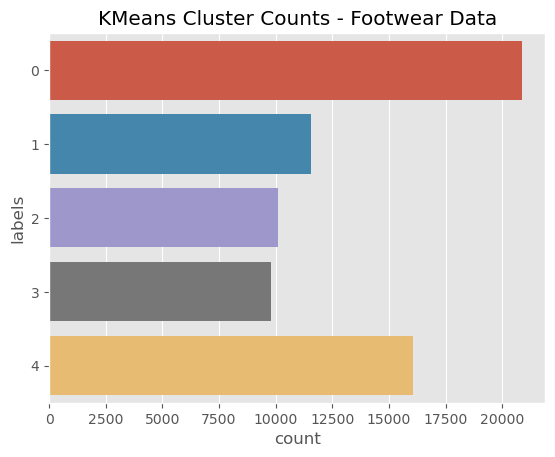

In [89]:
# Create a countplot for results of the raw and scaled data predictions 
sns.countplot(y="labels", data = results)
plt.title(f"KMeans Cluster Counts - {analyzed_feature} Data")
plt.show()

- **<span style="color:red">Cluster 0 - Brand Focus, Quality Footwear Shoppers</span>** 

- **<span style="color:blue">Cluster 1 - Upscaled and leisure- Fashion Footwear Shopper** </span> 

- **<span style="color:purple">Cluster 2 - Value driven, convienance and affordability** </span> 

- **<span style="color:black">Cluster 3 - Younger, Athletic Sports Footwear**</span> 

- **<span style="color:orange">Cluster 4 - Women's comfort oriented**</span> 
    
    
   

In [90]:
resulting_dataframe = pd.concat([df_AP3_ID, results], axis=1, join='inner')
label_name = f"{analyzed_feature}_labels"
labels_summary = labels.rename(columns = {'labels': f"{analyzed_feature}_labels"})
df_AP3_Summary = df_AP3
df_AP3_Summary = pd.concat([df_AP3_Summary, labels_summary], axis=1, join='inner')

In [91]:
label_name = f"{analyzed_feature}_labels"

## Analyze the relationship between the Footwear clusters, demographics, and policy decisions

In [92]:
# Merge the df_AP3_Footwear_Clusters with Demographic data in df_Demo
df_Abilitech_Demographics = pd.merge(resulting_dataframe, df_Demo, left_on='AbilitecContactID',right_on='APID',how='left')
df_Abilitech_Demographics = pd.DataFrame(df_Abilitech_Demographics)

In [93]:
avg_Income_Clusters = df_Abilitech_Demographics.groupby('labels')['Income_Dollars'].mean().reset_index(name='AvgIncome')
df_clusters = pd.DataFrame(df_clusters)

In [94]:
avg_age = df_Abilitech_Demographics.groupby('labels')['Age'].mean().reset_index(name='AvgAge')
df_clusters = pd.merge(df_clusters, avg_age, on='labels',how='left')

In [95]:
avg_discretionary = df_Abilitech_Demographics.groupby('labels')['Discretionary_Spending_Dollars'].mean().reset_index(name='AvgDI')
df_clusters = pd.merge(df_clusters, avg_discretionary, on='labels',how='left')

In [96]:
avg_Marital = df_Abilitech_Demographics.groupby('labels')['Married'].mean().reset_index(name='AvgMS')
df_clusters = pd.merge(df_clusters, avg_Marital, on='labels',how='left')

In [97]:
avg_Household = df_Abilitech_Demographics.groupby('labels')['Househoold_Size'].mean().reset_index(name='AvgHousehold')
df_clusters = pd.merge(df_clusters, avg_Household, on='labels',how='left')


In [98]:
avg_homeowner = df_Abilitech_Demographics.groupby('labels')['Homeowner'].mean().reset_index(name='AvgHomeowner')
df_clusters = pd.merge(df_clusters, avg_homeowner, on='labels',how='left')

In [99]:
df_clusters

,labels,AvgIncome,AvgAge_x,AvgDI_x,AvgMS_x,AvgHousehold_x,AvgHomeowner_x,AvgAge_y,AvgDI_y,AvgMS_y,AvgHousehold_y,AvgHomeowner_y
0,0,57718.571527,46.203262,8441.835615,0.286933,2.453451,0.488130,46.004558,8340.877711,0.285070,2.456055,0.489733
1,1,57943.337444,46.553125,8431.799701,0.297527,2.483092,0.503408,46.546061,8377.852674,0.300633,2.485224,0.511656
2,2,56804.084540,46.968535,8190.066136,0.300641,2.503918,0.513536,46.720716,8292.872378,0.292639,2.476059,0.492184
3,3,56649.627263,45.807751,8262.618512,0.284438,2.450016,0.490114,47.027545,8189.141706,0.298511,2.498266,0.509284
4,4,56844.048757,46.893164,8145.920292,0.293260,2.487333,0.500717,45.950231,8329.792129,0.286142,2.453599,0.490894


In [100]:
df_clusters = df_clusters.rename(columns = {'labels': 'Footwear_labels'})

### Summary of Footwear x Demographics
- No noticeable differences in the demographic information based upon the Abilitech's data about footwear shopping habits. 
- Policy based information will be viewed next. 

### Looking at the relationship between policies and clusters

In [101]:
initial_policy = df_AP3_Summary

In [102]:
df_AP3_Footwear_Policy = pd.merge(initial_policy, df_MasterQuote, on='AbilitecContactID', how='left')
df_AP3_Footwear_Policy.dropna()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,...,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecHouseholdID,DriverCount,GotPolicy
17,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,10/17/18 0:00,4/17/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,0.0
18,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,12/1/18 0:00,6/1/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,1.0
20,04ZJUS11ZYHD6SEZ,43315,9380.0,16.0,3.0,19,11.0,17.0,18.0,12.0,...,8/6/18 0:00,8/6/19 0:00,Homeowner-Needs Proof(hn),No Multi-Car Discount,18.0,0.0,1.0,04ZJUS036NHPR8J5,1.0,1.0
27,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,11/30/18 0:00,11/30/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,2.0,1.0
28,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,2/21/19 0:00,8/21/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78428,04ZJUS01BGTR0GG0,3060,4335.0,11.0,14.0,9,10.0,17.0,2.0,12.0,...,9/4/18 0:00,9/4/19 0:00,No Dwelling Discount,No Multi-Car Discount,39.0,0.0,1.0,04ZJUS03MSBPK5KS,1.0,1.0
78434,04ZJUS01BGP74HJZ,2808,1422.0,9.0,16.0,10,1.0,1.0,15.0,1.0,...,6/23/17 0:00,12/23/17 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03ZL9TQYEL,2.0,0.0
78437,04ZJUS01BGHXNKSR,23314,4065.0,6.0,7.0,19,11.0,3.0,12.0,1.0,...,4/20/18 0:00,4/20/19 0:00,No Dwelling Discount,No Multi-Car Discount,36.0,0.0,1.0,04ZJUS031FDFWHFK,2.0,1.0
78442,04ZJUS01BG20HEXJ,19939,4401.0,2.0,12.0,10,1.0,12.0,3.0,5.0,...,8/6/18 0:00,8/6/19 0:00,No Dwelling Discount,Multi-Car Discount,23.0,6.0,1.0,04ZJUS03W9HPYQTL,2.0,1.0


In [103]:
val = df_AP3_Footwear_Policy.groupby(label_name)['GotPolicy'].sum().reset_index(name='PolicyCount')
df_clusters = pd.DataFrame(val)

In [104]:
val = df_AP3_Footwear_Policy.groupby(label_name)['MQuotedTotalPayment'].mean().reset_index(name='AvgQuotedPayment')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [105]:
val = df_AP3_Footwear_Policy.groupby(label_name)['DriverCount'].mean().reset_index(name='AvgDriverCount')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [106]:
val = df_AP3_Footwear_Policy.groupby(label_name)['NamedInsuredDriverPoints'].mean().reset_index(name='AvgDriverPoints')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

### Look at the relationship between Claims and Footwear clusters

In [107]:
###Change here
initial_claim_group = df_AP3_Footwear_Policy
label_name = 'Footwear_labels'

In [108]:
initial_claim_group = initial_claim_group.dropna()

In [109]:
df_AP3_Claims = pd.merge(initial_claim_group, df_ClaimMasterTrans_Final, on='PolicyNumber',how='left')

In [110]:
df_AP3_Claims = df_AP3_Claims.dropna()

In [111]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].sum().reset_index(name='ClaimTotal')
df_clusters_claims = pd.merge(df_clusters, val, on=label_name,how='left')

In [112]:
val = df_AP3_Claims.groupby(label_name)['ClaimNumber'].count().reset_index(name='ClaimCount')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [113]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].mean().reset_index(name='AvgClaimAmnt')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [114]:
df_clusters_claims['ClaimToPolicy'] = round((df_clusters_claims['ClaimCount']/df_clusters_claims['PolicyCount']), 2)

In [115]:
val = df_AP3_Claims.groupby(label_name)['DaysToClaim'].mean().reset_index(name='AvgDaysToClaim')
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [116]:
df_clusters_claims['AvgPolicyProfit'] = (df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment']

In [117]:
df_clusters_claims['TotalPolicyProfits'] = round(((df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment'])*df_clusters_claims['PolicyCount'],2)

### Footwear Claim and Policy Information

In [118]:
df_clusters_claims_Footwear = df_clusters_claims
df_clusters_claims_Footwear

,Footwear_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,ClaimTotal,ClaimCount,AvgClaimAmnt,ClaimToPolicy,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,4770.0,1590.753802,1.794801,1.404720,4862917.78,1229,3956.81,0.26,129.183889,2482.146395,11839838.30
1,1,2635.0,1576.071170,1.775776,1.464872,2518325.65,629,4003.70,0.24,135.688394,2599.084387,6848587.36
2,2,2222.0,1555.912923,1.807903,1.435236,2045986.50,578,3539.77,0.26,132.048443,2629.128824,5841924.25
3,3,2229.0,1578.725128,1.813559,1.300164,1832393.37,509,3599.99,0.23,129.090373,3031.826887,6757942.13
4,4,3629.0,1532.913822,1.734904,1.399137,3292136.46,874,3766.75,0.24,135.615561,2590.267522,9400080.84


### Analyzing the Relationship of Retail Clusters to Claims 

In [119]:
df_clusters_claims

,Footwear_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,ClaimTotal,ClaimCount,AvgClaimAmnt,ClaimToPolicy,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,4770.0,1590.753802,1.794801,1.404720,4862917.78,1229,3956.81,0.26,129.183889,2482.146395,11839838.30
1,1,2635.0,1576.071170,1.775776,1.464872,2518325.65,629,4003.70,0.24,135.688394,2599.084387,6848587.36
2,2,2222.0,1555.912923,1.807903,1.435236,2045986.50,578,3539.77,0.26,132.048443,2629.128824,5841924.25
3,3,2229.0,1578.725128,1.813559,1.300164,1832393.37,509,3599.99,0.23,129.090373,3031.826887,6757942.13
4,4,3629.0,1532.913822,1.734904,1.399137,3292136.46,874,3766.75,0.24,135.615561,2590.267522,9400080.84


## Basic Comparisons

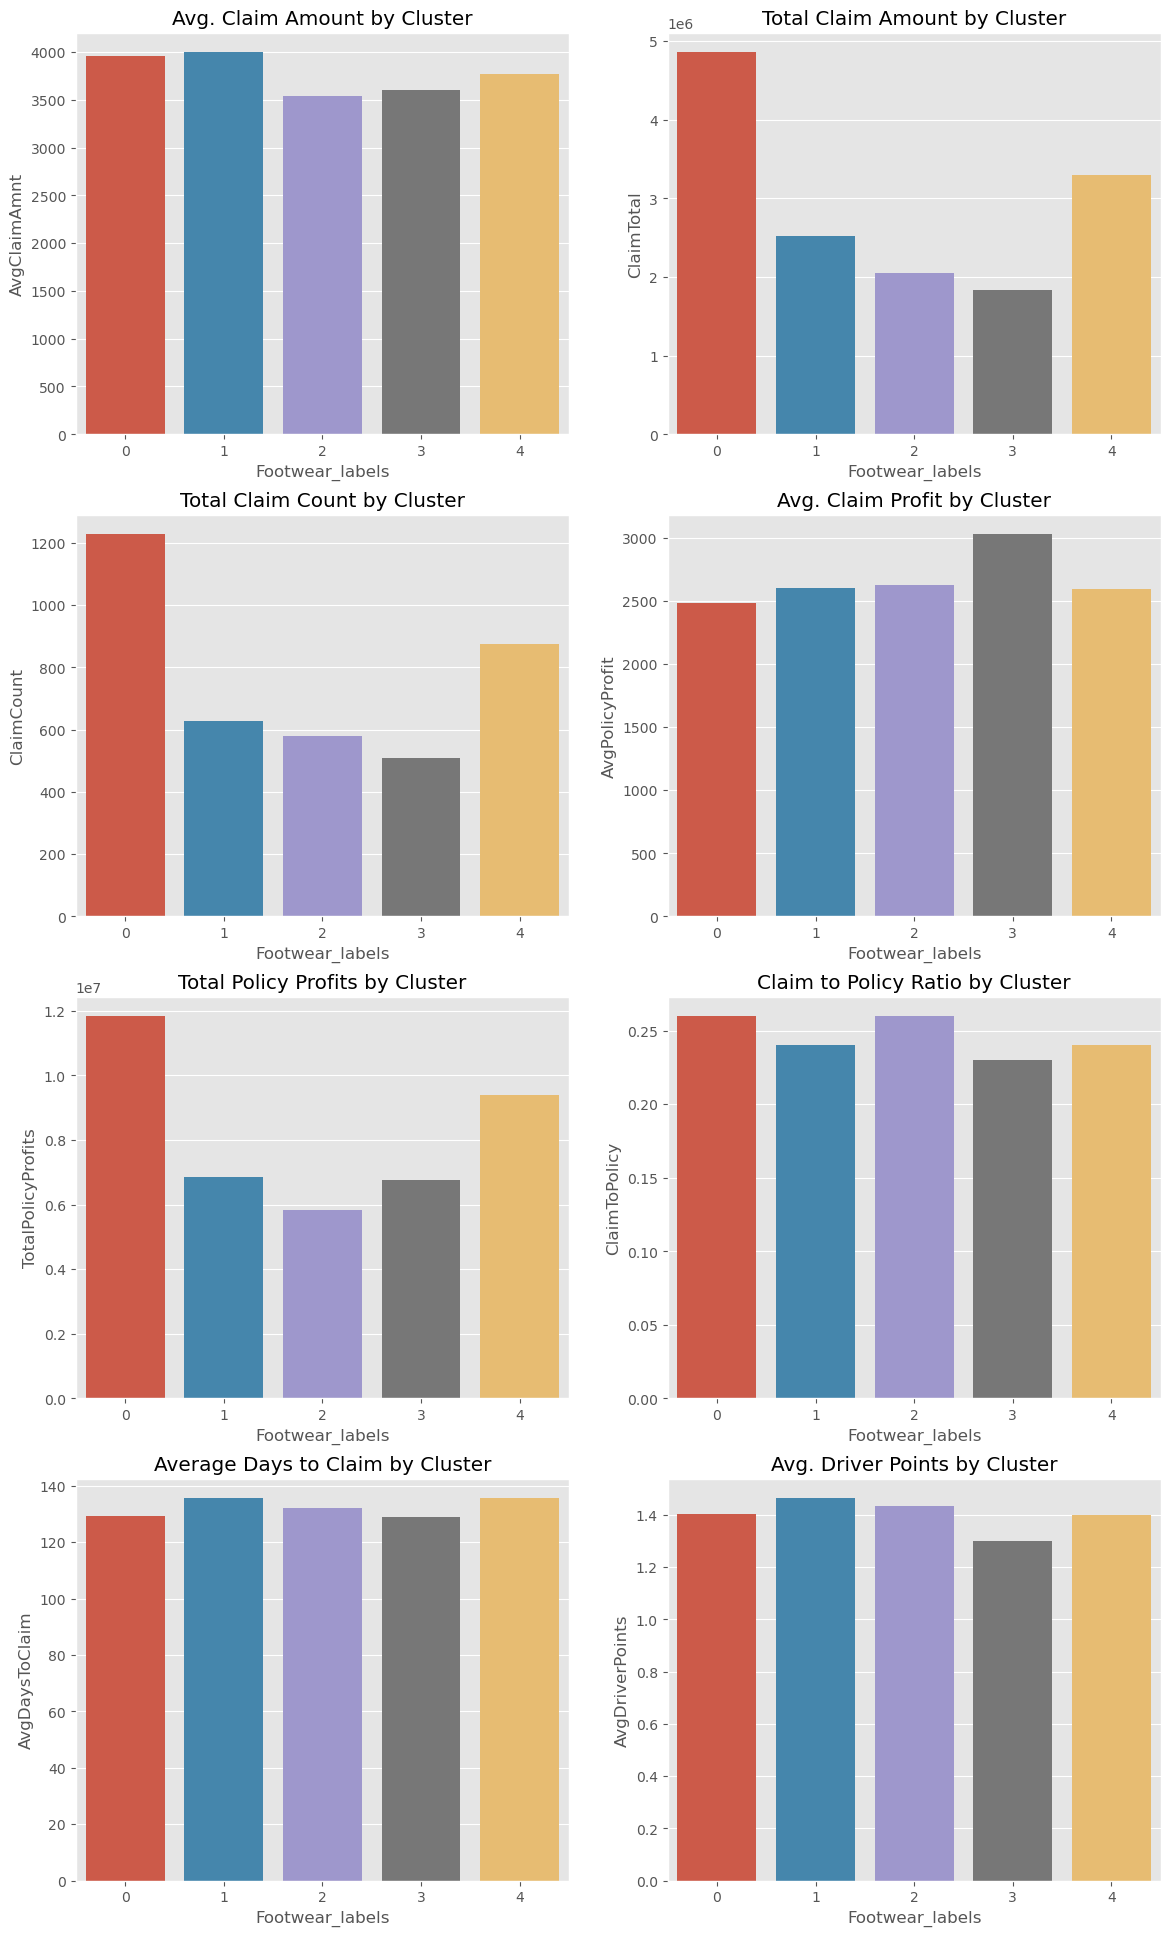

In [120]:
fig, axs = plt.subplots(4,2, figsize=(14,24))
sns.barplot(x=label_name, y='AvgClaimAmnt', ax=axs[0,0], data = df_clusters_claims)
axs[0,0].set_title('Avg. Claim Amount by Cluster')

sns.barplot(x=label_name, y='ClaimTotal', ax=axs[0,1], data = df_clusters_claims)
axs[0,1].set_title('Total Claim Amount by Cluster')

sns.barplot(x=label_name, y='ClaimCount', ax=axs[1,0], data = df_clusters_claims)
axs[1,0].set_title('Total Claim Count by Cluster')

sns.barplot(x=label_name, y='AvgPolicyProfit', ax=axs[1,1], data = df_clusters_claims)
axs[1,1].set_title('Avg. Claim Profit by Cluster')

sns.barplot(x=label_name, y='TotalPolicyProfits', ax=axs[2,0], data = df_clusters_claims)
axs[2,0].set_title('Total Policy Profits by Cluster')

sns.barplot(x=label_name, y='ClaimToPolicy', ax=axs[2,1], data = df_clusters_claims)
axs[2,1].set_title('Claim to Policy Ratio by Cluster')

sns.barplot(x=label_name, y='AvgDaysToClaim', ax=axs[3,0], data = df_clusters_claims)
axs[3,0].set_title('Average Days to Claim by Cluster')

sns.barplot(x=label_name, y='AvgDriverPoints', ax=axs[3,1], data = df_clusters_claims)
axs[3,1].set_title('Avg. Driver Points by Cluster')

plt.show() 

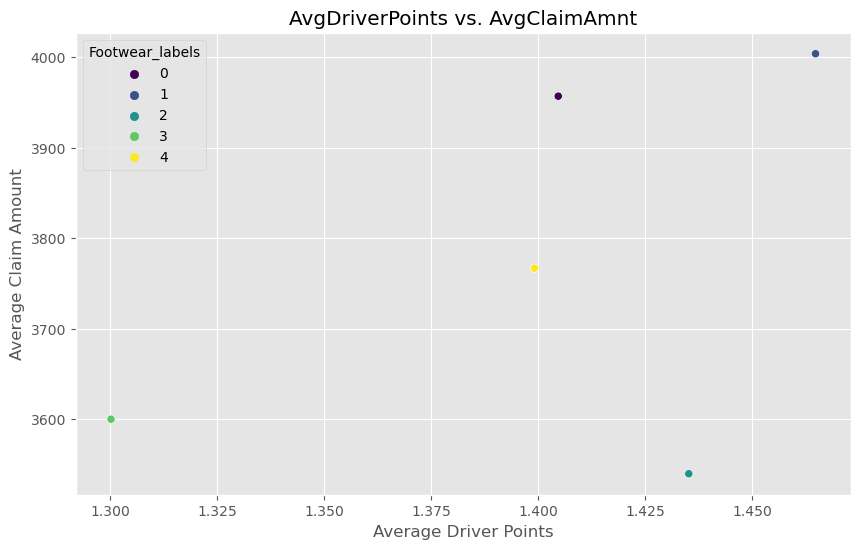

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters_claims, x='AvgDriverPoints', y='AvgClaimAmnt', hue='Footwear_labels', palette='viridis')
plt.title('AvgDriverPoints vs. AvgClaimAmnt')
plt.xlabel('Average Driver Points')
plt.ylabel('Average Claim Amount')
plt.show()

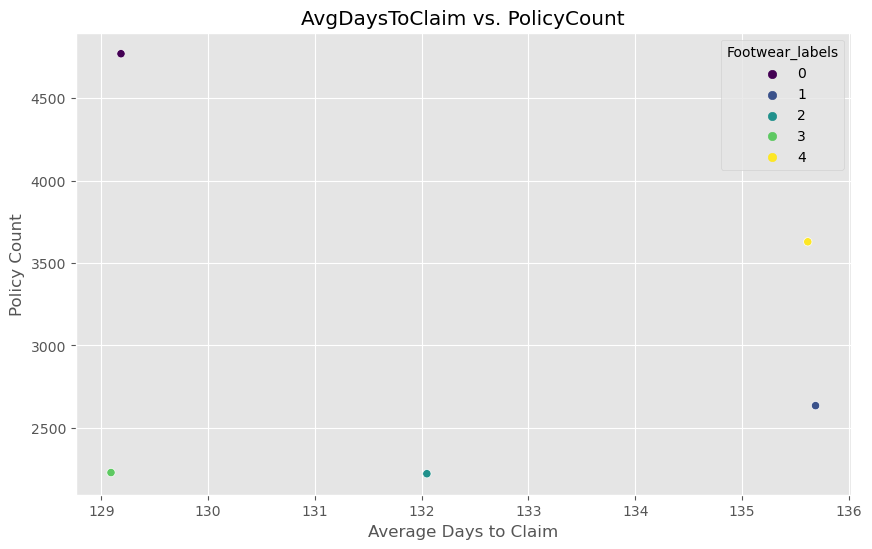

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters_claims, x='AvgDaysToClaim', y='PolicyCount', hue='Footwear_labels', palette='viridis')
plt.title('AvgDaysToClaim vs. PolicyCount')
plt.xlabel('Average Days to Claim')
plt.ylabel('Policy Count')
plt.show()

### Analyzing the Retailer Clusters

In [123]:
df_clusters_claims

,Footwear_labels,PolicyCount,AvgQuotedPayment,AvgDriverCount,AvgDriverPoints,ClaimTotal,ClaimCount,AvgClaimAmnt,ClaimToPolicy,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,4770.0,1590.753802,1.794801,1.404720,4862917.78,1229,3956.81,0.26,129.183889,2482.146395,11839838.30
1,1,2635.0,1576.071170,1.775776,1.464872,2518325.65,629,4003.70,0.24,135.688394,2599.084387,6848587.36
2,2,2222.0,1555.912923,1.807903,1.435236,2045986.50,578,3539.77,0.26,132.048443,2629.128824,5841924.25
3,3,2229.0,1578.725128,1.813559,1.300164,1832393.37,509,3599.99,0.23,129.090373,3031.826887,6757942.13
4,4,3629.0,1532.913822,1.734904,1.399137,3292136.46,874,3766.75,0.24,135.615561,2590.267522,9400080.84


### Relationships between Footwear Clusters x Policies x Demographics x Claims


- **<span style="color:red">Cluster 0 - Brand Focus, Quality Footwear Shoppers</span>**
    - Highest policy count
    - Lowest Overall profit. Highest claim to policy ratio
    - Highest average quoted premium, possibly due to seeking better "comfier" coverage. 
        
- **<span style="color:blue">Cluster 1 - Upscaled and leisure- Fashion Footwear Shopper** </span>
    - Files less often, 
    - High profit, possibly due to high cost insurance policies 
    - Highest avg days to claim. 

    
- **<span style="color:purple">Cluster 2 - Value driven, convienance and affordability** </span>
    - Lowest avg payment. 
    - Searches for affordability and value. 
    - Tied for highest claim to policy ratio but lowest claim amount

    
- **<span style="color:black">Cluster 3 - Younger, Athletic Sports Footwear**</span> 
    - High Profit policy 
    - Lowest annual days to claim
    - Claim to policy is the lowest. 

- **<span style="color:orange">Cluster 4 - Women's comfort oriented**</span>
    - Highest avg. days to claim with 1. 
    - Average other features. 


    

###############################################################################################################################
## Analyze df_AP3_Videos

In [124]:
analyzed_feature = "Videos"
label_name = f"{analyzed_feature}_labels"
initial_dataframe = df_AP3_Videos_Final

In [125]:
# scaler function in new df_AP3_Footwear_Final 
scaler = StandardScaler()
scaler.fit(initial_dataframe)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_dataframe = scaler.transform(initial_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=initial_dataframe.columns)

### Determine ideal cluster size for df_AP3_Footwear from intertia model

In [126]:
'''ks = range(1,11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(scaled_dataframe)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title(f"Inertia Model - Scaled {analyzed_feature} Data")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show'''

'ks = range(1,11)\ninertias = []\n\nfor k in ks: \n    model = KMeans(n_clusters = k, n_init=10)\n    model.fit(scaled_dataframe)\n    inertias.append(model.inertia_)\n    print(f"iteration {k} done")\n    \nplt.plot(ks, inertias, \'-o\')\nplt.title(f"Inertia Model - Scaled {analyzed_feature} Data")\nplt.xlabel(\'number of clusters, k\')\nplt.ylabel(\'inertia\')\nplt.xticks(ks)\nplt.show'

In [127]:
# Create a K-Means for 5 clusters
model = KMeans(n_clusters=4, n_init=10, random_state=42)
model.fit(scaled_dataframe)
labels = model.predict(scaled_dataframe)
labels = pd.DataFrame(labels)
labels = labels.rename(columns = {0: 'labels'})
results = pd.concat([initial_dataframe, labels], axis=1, join='inner')

In [128]:
# Identifies the centers of each cluster and the 5 most relevant column scores
centers = model.cluster_centers_
print(f"Top Features of {analyzed_feature} Clusters in Abilitech Data")
for i, center in enumerate(centers):
    print(f"Cluster {i}")
    
    # Adjust the number to select top N features
    for feature in np.argsort(-center)[:5]:  
        #print(f"Feature {feature} with value {center[feature]}")
        text = f"Feature Name: {initial_dataframe.columns[feature]}"
        #part = text.split("_V2")[0]
        #start_index = part.find("Purchase")
        #result = part[start_index:]
        feature_value = f"{text}: {round(center[feature], 3)}"
        print(feature_value)
    print('\n')
        


Top Features of Videos Clusters in Abilitech Data
Cluster 0
Feature Name: AP004048_Buy_Rent_Stream_Videos_from_Kmart_V2_rank_base_20_RBGM3843: 1.324
Feature Name: AP004064_Buy_Rent_Stream_Videos_from_Walmart_V2_rank_base_20_RBGM3872: 1.199
Feature Name: AP004065_Buy_Rent_Stream_Videos_from_Walmart_com_V2_rank_base_20_RBGM3873: 1.154
Feature Name: AP004023_Purchase_Other_Videos_V2_rank_base_20_RBGM3974: 0.958
Feature Name: AP004036_Buy_Rent_Stream_Videos_from_Columbia_House_V2_rank_base_20_RBGM3827: 0.942


Cluster 1
Feature Name: AP004030_Buy_Rent_Stream_Videos_from_Borders_V2_rank_base_20_RBGM3819: 0.897
Feature Name: AP004055_Buy_Rent_Stream_Videos_from_Sams_Club_V2_rank_base_20_RBGM3857: 0.787
Feature Name: AP004049_Buy_Rent_Stream_Videos_from_Meijer_V2_rank_base_20_RBGM3845: 0.751
Feature Name: AP004069_Buy_Rent_Stream_Videos_from_BJs_V2_rank_base_20_RBGM3815: 0.623
Feature Name: AP004037_Buy_Rent_Stream_Videos_from_Costco_V2_rank_base_20_RBGM3829: 0.52


Cluster 2
Feature Name: AP

### Resulting Dataframe Clusters

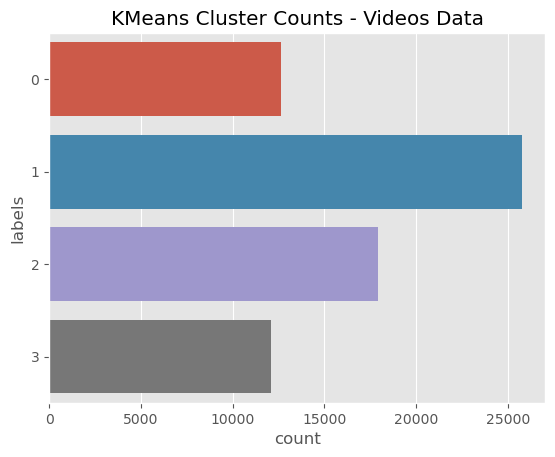

In [129]:
# Create a countplot for results of the raw and scaled data predictions 
sns.countplot(y="labels", data = results)
plt.title(f"KMeans Cluster Counts - {analyzed_feature} Data")
plt.show()

In [130]:
resulting_dataframe = pd.concat([df_AP3_ID, results], axis=1, join='inner')
labels_summary = labels.rename(columns = {'labels': label_name})
df_AP3_Summary = pd.concat([df_AP3_Summary, labels_summary], axis=1, join='inner')

## Analyze the relationship between the Video clusters, demographics, and policy decisions

In [131]:
# Merge the df_AP3_Videos_Clusters with Demographic data in df_Demo
df_Abilitech_Demographics = pd.merge(resulting_dataframe, df_Demo, left_on='AbilitecContactID',right_on='APID',how='left')
df_Abilitech_Demographics = pd.DataFrame(df_Abilitech_Demographics)

In [132]:
avg_Income_Clusters = df_Abilitech_Demographics.groupby('labels')['Income_Dollars'].mean().reset_index(name='AvgIncome')
df_clusters = pd.DataFrame(avg_Income_Clusters)

In [133]:
avg_age = df_Abilitech_Demographics.groupby('labels')['Age'].mean().reset_index(name='AvgAge')
df_clusters = pd.merge(df_clusters, avg_age, on='labels',how='left')

In [134]:
avg_discretionary = df_Abilitech_Demographics.groupby('labels')['Discretionary_Spending_Dollars'].mean().reset_index(name='AvgDI')
df_clusters = pd.merge(df_clusters, avg_discretionary, on='labels',how='left')

In [135]:
avg_Marital = df_Abilitech_Demographics.groupby('labels')['Married'].mean().reset_index(name='AvgMS')
df_clusters = pd.merge(df_clusters, avg_Marital, on='labels',how='left')


In [136]:
avg_Household = df_Abilitech_Demographics.groupby('labels')['Househoold_Size'].mean().reset_index(name='AvgHousehold')
df_clusters = pd.merge(df_clusters, avg_Household, on='labels',how='left')


In [137]:
avg_homeowner = df_Abilitech_Demographics.groupby('labels')['Homeowner'].mean().reset_index(name='AvgHomeowner')
df_clusters = pd.merge(df_clusters, avg_homeowner, on='labels',how='left')

In [138]:
df_clusters

,labels,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner
0,0,57523.537803,46.579252,8350.984942,0.289349,2.471073,0.497068
1,1,56888.988188,45.949759,8290.782484,0.285204,2.452557,0.488537
2,2,57645.687776,46.411939,8418.820245,0.295679,2.489688,0.500084
3,3,56929.978480,46.792005,8178.951001,0.298129,2.473597,0.509684


### Video Policy Data

In [139]:
df_AP3_Video_Policy = pd.merge(df_AP3_Summary, df_MasterQuote, on='AbilitecContactID', how='left')
df_AP3_Video_Policy.dropna()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,...,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecHouseholdID,DriverCount,GotPolicy
17,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,10/17/18 0:00,4/17/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,0.0
18,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,12/1/18 0:00,6/1/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,1.0
20,04ZJUS11ZYHD6SEZ,43315,9380.0,16.0,3.0,19,11.0,17.0,18.0,12.0,...,8/6/18 0:00,8/6/19 0:00,Homeowner-Needs Proof(hn),No Multi-Car Discount,18.0,0.0,1.0,04ZJUS036NHPR8J5,1.0,1.0
27,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,11/30/18 0:00,11/30/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,2.0,1.0
28,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,2/21/19 0:00,8/21/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78428,04ZJUS01BGTR0GG0,3060,4335.0,11.0,14.0,9,10.0,17.0,2.0,12.0,...,9/4/18 0:00,9/4/19 0:00,No Dwelling Discount,No Multi-Car Discount,39.0,0.0,1.0,04ZJUS03MSBPK5KS,1.0,1.0
78434,04ZJUS01BGP74HJZ,2808,1422.0,9.0,16.0,10,1.0,1.0,15.0,1.0,...,6/23/17 0:00,12/23/17 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03ZL9TQYEL,2.0,0.0
78437,04ZJUS01BGHXNKSR,23314,4065.0,6.0,7.0,19,11.0,3.0,12.0,1.0,...,4/20/18 0:00,4/20/19 0:00,No Dwelling Discount,No Multi-Car Discount,36.0,0.0,1.0,04ZJUS031FDFWHFK,2.0,1.0
78442,04ZJUS01BG20HEXJ,19939,4401.0,2.0,12.0,10,1.0,12.0,3.0,5.0,...,8/6/18 0:00,8/6/19 0:00,No Dwelling Discount,Multi-Car Discount,23.0,6.0,1.0,04ZJUS03W9HPYQTL,2.0,1.0


In [140]:
df_AP3_Video_Policy['Videos_labels']

0        1
1        1
2        1
3        2
4        0
        ..
78441    3
78442    1
78443    1
78444    1
78445    1
Name: Videos_labels, Length: 78446, dtype: int32

In [141]:
val = df_AP3_Video_Policy.groupby(label_name)['GotPolicy'].sum().reset_index(name='PolicyCount')
df_clusters = pd.DataFrame(val)

In [142]:
val = df_AP3_Video_Policy.groupby(label_name)['MQuotedTotalPayment'].mean().reset_index(name='AvgQuotedPayment')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [143]:
val = df_AP3_Video_Policy.groupby(label_name)['PolicyTerm'].mean().reset_index(name='AvgTermLength')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [144]:
val = df_AP3_Video_Policy.groupby(label_name)['DriverCount'].mean().reset_index(name='AvgDriverCount')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [145]:
val = df_AP3_Video_Policy.groupby(label_name)['NamedInsuredDriverPoints'].mean().reset_index(name='AvgDriverPoints')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [146]:
df_clusters

,Videos_labels,PolicyCount,AvgQuotedPayment,AvgTermLength,AvgDriverCount,AvgDriverPoints
0,0,2855.0,1597.678077,9.824048,1.799957,1.473220
1,1,5888.0,1570.491377,9.810944,1.758794,1.414318
2,2,3978.0,1536.320182,9.814731,1.796957,1.387709
3,3,2764.0,1578.263749,9.726016,1.791271,1.331245


### Realtionship between Claims and Video Consumption

In [147]:
###Change here
initial_claim_group = df_AP3_Video_Policy

In [148]:
initial_claim_group = initial_claim_group.dropna()

In [149]:
df_AP3_Claims = pd.merge(initial_claim_group, df_ClaimMasterTrans_Final, on='PolicyNumber',how='left')

In [150]:
df_AP3_Claims = df_AP3_Claims.dropna()

In [151]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].sum().reset_index(name='ClaimTotal')
df_clusters_claims = pd.merge(df_clusters, val, on=label_name,how='left')

In [152]:
val = df_AP3_Claims.groupby(label_name)['ClaimNumber'].count().reset_index(name='ClaimCount')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [153]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].mean().reset_index(name='Avg Claim Amnt')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [154]:
val = df_AP3_Claims.groupby(label_name)['DaysToClaim'].mean().reset_index(name='AvgDaysToClaim')
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [155]:
df_clusters_claims['AvgPolicyProfit'] = (df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment']

In [156]:
df_clusters_claims['TotalPolicyProfits'] = round(((df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment'])*df_clusters_claims['PolicyCount'],2)

### Videos Claim and Policy Information

In [157]:
df_clusters_claims_Videos = df_clusters_claims
df_clusters_claims_Videos

,Videos_labels,PolicyCount,AvgQuotedPayment,AvgTermLength,AvgDriverCount,AvgDriverPoints,ClaimTotal,ClaimCount,Avg Claim Amnt,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,2855.0,1597.678077,9.824048,1.799957,1.473220,3080067.72,776,3969.16,135.963918,2366.052622,6755080.23
1,1,5888.0,1570.491377,9.810944,1.758794,1.414318,5623215.91,1467,3833.14,131.990457,2582.582208,15206244.04
2,2,3978.0,1536.320182,9.814731,1.796957,1.387709,3712841.77,976,3804.14,130.928279,2528.842660,10059736.10
3,3,2764.0,1578.263749,9.726016,1.791271,1.331245,2135634.36,600,3559.39,129.583333,3223.816411,8910628.56


### Avg. Profit per Policy

<Axes: xlabel='Videos_labels', ylabel='AvgPolicyProfit'>

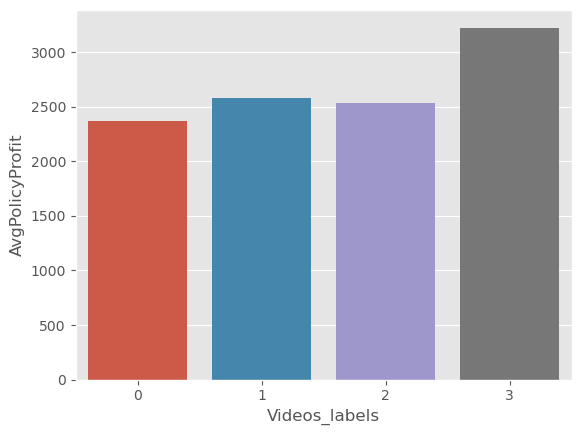

In [158]:
sns.barplot(x=label_name, y='AvgPolicyProfit', data = df_clusters_claims_Videos)

### Total Profit per Cluster

<Axes: xlabel='Videos_labels', ylabel='TotalPolicyProfits'>

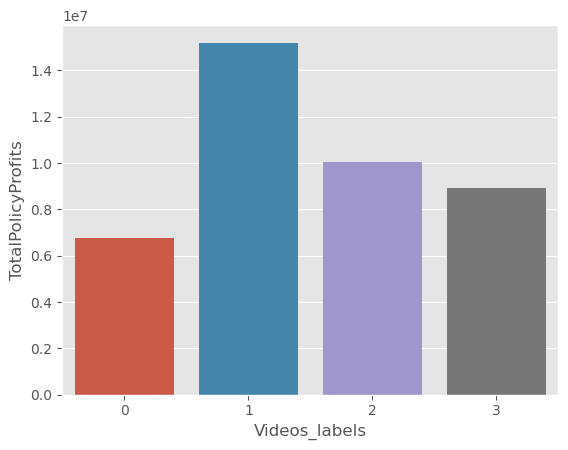

In [159]:
sns.barplot(x=label_name, y='TotalPolicyProfits', data = df_clusters_claims_Videos)

### Total Claims Per Cluster

<Axes: xlabel='Videos_labels', ylabel='ClaimTotal'>

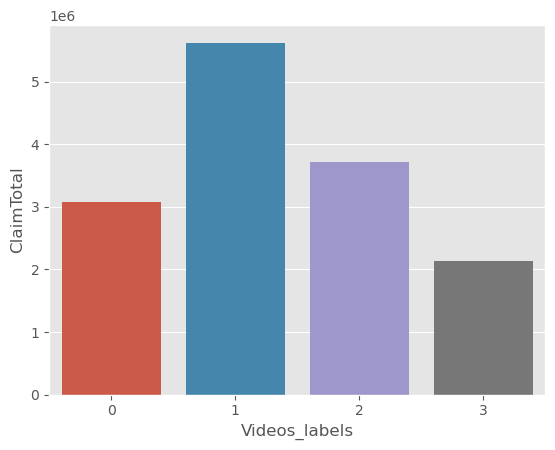

In [160]:
sns.barplot(x=label_name, y='ClaimTotal', data = df_clusters_claims_Videos)

### Relationships between Videos Clusters x Policies x Demographics

- None. 


##############################################################################################################################

### Analyzing the Dining Data

In [161]:
analyzed_feature = "Dining"
initial_dataframe = df_AP3_Dining_Final
label_name = f"{analyzed_feature}_labels"

In [162]:
# scaler function in new df_AP3_Footwear_Final 
scaler = StandardScaler()
scaler.fit(initial_dataframe)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_dataframe = scaler.transform(initial_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=initial_dataframe.columns)

### Determine ideal cluster size for df_AP3_Footwear from intertia model

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done


<function matplotlib.pyplot.show(close=None, block=None)>

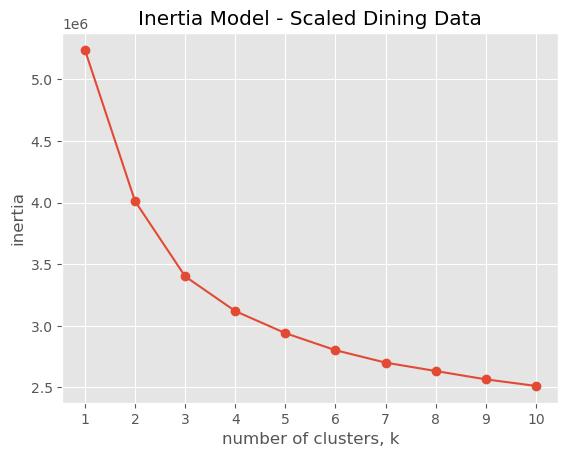

In [163]:
ks = range(1,11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters = k, n_init=10)
    model.fit(scaled_dataframe)
    inertias.append(model.inertia_)
    print(f"iteration {k} done")
    
plt.plot(ks, inertias, '-o')
plt.title(f"Inertia Model - Scaled {analyzed_feature} Data")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [164]:
# Create a K-Means for 5 clusters
model = KMeans(n_clusters=4, n_init=10, random_state=42)
model.fit(scaled_dataframe)
labels = model.predict(scaled_dataframe)
labels = pd.DataFrame(labels)
labels = labels.rename(columns = {0: 'labels'})
results = pd.concat([initial_dataframe, labels], axis=1, join='inner')

In [165]:
# Identifies the centers of each cluster and the 5 most relevant column scores
centers = model.cluster_centers_
print(f"Top Features of {analyzed_feature} Clusters in Abilitech Data")
for i, center in enumerate(centers):
    print(f"Cluster {i}")
    
    # Adjust the number to select top N features
    for feature in np.argsort(-center)[:5]:  
        #print(f"Feature {feature} with value {center[feature]}")
        text = f"Feature Name: {initial_dataframe.columns[feature]}"
        #part = text.split("_V2")[0]
        #start_index = part.find("Purchase")
        #result = part[start_index:]
        feature_value = f"{text}: {round(center[feature], 3)}"
        print(feature_value)
    print('\n')
        


Top Features of Dining Clusters in Abilitech Data
Cluster 0
Feature Name: AP004147_Out_of_Home_Consumption_at_Papa_Johns_V2_rank_base_20_RBGM3999: 1.197
Feature Name: AP004097_Dine_at_a_Quick_Service_Mexican_Restaurant_V2_rank_base_20_RBGMN358: 1.182
Feature Name: AP004139_Out_of_Home_Consumption_at_Dominos_V2_rank_base_20_RBGM3987: 1.146
Feature Name: AP004142_Out_of_Home_Consumption_at_Subway_V2_rank_base_20_RBGM4006: 1.135
Feature Name: AP004101_Dine_at_a_Quick_Service_Asian_Restaurant_V2_rank_base_20_RBGMN362: 1.134


Cluster 1
Feature Name: AP004117_Dine_at_a_Midscale_Italian_Restaurant_V2_rank_base_20_RBGMN379: 0.793
Feature Name: AP004126_Dine_at_a_Casual_Dining_Italian_Restaurant_V2_rank_base_20_RBGMN388: 0.762
Feature Name: AP004122_Dine_at_a_Casual_Dining_Seafood_Restaurant_V2_rank_base_20_RBGMN384: 0.71
Feature Name: AP004155_Out_of_Home_Consumption_at_TGI_Fridays_V2_rank_base_20_RBGM4008: 0.673
Feature Name: AP004124_Dine_at_a_Casual_Dining_Steak_Rib_Restaurant_V2_rank_base

### Resulting Dataframe Clusters

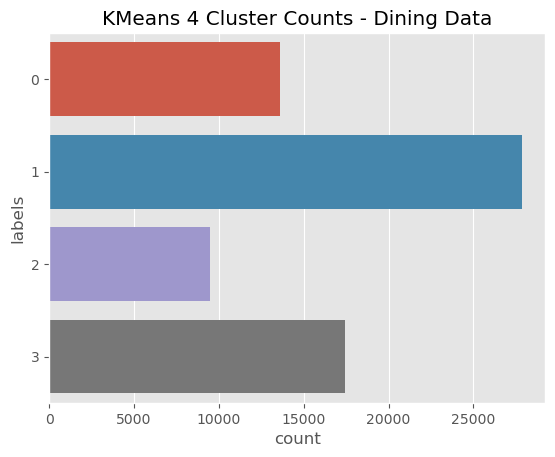

In [166]:
# Create a countplot for results of the raw and scaled data predictions 
sns.countplot(y="labels", data = results)
plt.title(f"KMeans 4 Cluster Counts - {analyzed_feature} Data")
plt.show()

In [167]:
resulting_dataframe = pd.concat([df_AP3_ID, results], axis=1, join='inner')
labels_summary = labels.rename(columns = {'labels': label_name})
df_AP3_Summary = pd.concat([df_AP3_Summary, labels_summary], axis=1, join='inner')

## Analyze the relationship between the Dining clusters, demographics, and policy decisions

In [168]:
# Merge the df_AP3_Videos_Clusters with Demographic data in df_Demo
df_Abilitech_Demographics = pd.merge(resulting_dataframe, df_Demo, left_on='AbilitecContactID',right_on='APID',how='left')
df_Abilitech_Demographics = pd.DataFrame(df_Abilitech_Demographics)

In [169]:
avg_Income_Clusters = df_Abilitech_Demographics.groupby('labels')['Income_Dollars'].mean().reset_index(name='AvgIncome')
df_clusters = pd.DataFrame(avg_Income_Clusters)

In [170]:
avg_age = df_Abilitech_Demographics.groupby('labels')['Age'].mean().reset_index(name='AvgAge')
df_clusters = pd.merge(df_clusters, avg_age, on='labels',how='left')

In [171]:
avg_discretionary = df_Abilitech_Demographics.groupby('labels')['Discretionary_Spending_Dollars'].mean().reset_index(name='AvgDI')
df_clusters = pd.merge(df_clusters, avg_discretionary, on='labels',how='left')

In [172]:
avg_Marital = df_Abilitech_Demographics.groupby('labels')['Married'].mean().reset_index(name='AvgMS')
df_clusters = pd.merge(df_clusters, avg_Marital, on='labels',how='left')


In [173]:
avg_Household = df_Abilitech_Demographics.groupby('labels')['Househoold_Size'].mean().reset_index(name='AvgHousehold')
df_clusters = pd.merge(df_clusters, avg_Household, on='labels',how='left')


In [174]:
avg_homeowner = df_Abilitech_Demographics.groupby('labels')['Homeowner'].mean().reset_index(name='AvgHomeowner')
df_clusters = pd.merge(df_clusters, avg_homeowner, on='labels',how='left')

In [175]:
df_clusters

,labels,AvgIncome,AvgAge,AvgDI,AvgMS,AvgHousehold,AvgHomeowner
0,0,57572.900567,46.812909,8310.585413,0.301391,2.495032,0.511518
1,1,56797.520661,45.984046,8289.953899,0.286058,2.455300,0.492526
2,2,56779.512607,46.996202,8217.135985,0.293702,2.467876,0.498048
3,3,57825.884918,46.167001,8414.200677,0.289312,2.472836,0.491768


### Dining Policy Data

In [176]:
df_AP3_Dining_Policy = pd.merge(df_AP3_Summary, df_MasterQuote, on='AbilitecContactID', how='left')
df_AP3_Dining_Policy.dropna()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP003732_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4869,AP003733_Influenced_to_Purchase_Discount_Mass_Merchant_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4870,AP003734_Influenced_to_Purchase_Department_Store_Footwear_Due_to_Advertising_V2_rank_base_20_rbgm4871,AP003739_Influenced_to_Purchase_Apparel_Specialty_Footwear_Due_to_Advertising_V2_rank_base_20_RBGM4876,AP003746_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Price_Special_Offer_V2_rank_base_20_RBGM4885,AP003782_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_Technology_V2_rank_base_20_RBGM4925,AP003797_Influenced_to_Purchase_Athletic_Shoe_Store_Footwear_Due_to_a_Specific_Shoe_Model_V2_rank_base_20_RBGM4941,...,TermEffectiveDate,TermExpirationDate,DsDwellingDescription,DsMultiCarDescription,NamedInsuredAge,NamedInsuredDriverPoints,DriverNumber,AbilitecHouseholdID,DriverCount,GotPolicy
17,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,10/17/18 0:00,4/17/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,0.0
18,04ZJUS11ZYQK25L7,20772,3938.0,7.0,13.0,2,9.0,7.0,16.0,12.0,...,12/1/18 0:00,6/1/19 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03JSK5QEJS,1.0,1.0
20,04ZJUS11ZYHD6SEZ,43315,9380.0,16.0,3.0,19,11.0,17.0,18.0,12.0,...,8/6/18 0:00,8/6/19 0:00,Homeowner-Needs Proof(hn),No Multi-Car Discount,18.0,0.0,1.0,04ZJUS036NHPR8J5,1.0,1.0
27,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,11/30/18 0:00,11/30/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,2.0,1.0
28,04ZJUS11ZXWVTVLD,47576,9039.0,11.0,11.0,11,9.0,12.0,10.0,9.0,...,2/21/19 0:00,8/21/19 0:00,No Dwelling Discount,No Multi-Car Discount,29.0,0.0,1.0,04ZJUS035EXTYQTN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78428,04ZJUS01BGTR0GG0,3060,4335.0,11.0,14.0,9,10.0,17.0,2.0,12.0,...,9/4/18 0:00,9/4/19 0:00,No Dwelling Discount,No Multi-Car Discount,39.0,0.0,1.0,04ZJUS03MSBPK5KS,1.0,1.0
78434,04ZJUS01BGP74HJZ,2808,1422.0,9.0,16.0,10,1.0,1.0,15.0,1.0,...,6/23/17 0:00,12/23/17 0:00,No Dwelling Discount,No Multi-Car Discount,22.0,0.0,1.0,04ZJUS03ZL9TQYEL,2.0,0.0
78437,04ZJUS01BGHXNKSR,23314,4065.0,6.0,7.0,19,11.0,3.0,12.0,1.0,...,4/20/18 0:00,4/20/19 0:00,No Dwelling Discount,No Multi-Car Discount,36.0,0.0,1.0,04ZJUS031FDFWHFK,2.0,1.0
78442,04ZJUS01BG20HEXJ,19939,4401.0,2.0,12.0,10,1.0,12.0,3.0,5.0,...,8/6/18 0:00,8/6/19 0:00,No Dwelling Discount,Multi-Car Discount,23.0,6.0,1.0,04ZJUS03W9HPYQTL,2.0,1.0


In [177]:
val = df_AP3_Dining_Policy.groupby(label_name)['GotPolicy'].sum().reset_index(name='PolicyCount')
df_clusters = pd.DataFrame(val)

In [178]:
val = df_AP3_Dining_Policy.groupby(label_name)['MQuotedTotalPayment'].mean().reset_index(name='AvgQuotedPayment')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [179]:
val = df_AP3_Dining_Policy.groupby(label_name)['PolicyTerm'].mean().reset_index(name='AvgTermLength')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [180]:
val = df_AP3_Dining_Policy.groupby(label_name)['DriverCount'].mean().reset_index(name='AvgDriverCount')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [181]:
val = df_AP3_Dining_Policy.groupby(label_name)['NamedInsuredDriverPoints'].mean().reset_index(name='AvgDriverPoints')
df_clusters = pd.merge(df_clusters, val, on=label_name,how='left')

In [182]:
df_clusters

,Dining_labels,PolicyCount,AvgQuotedPayment,AvgTermLength,AvgDriverCount,AvgDriverPoints
0,0,3060.0,1569.330849,9.724299,1.804517,1.392329
1,1,6332.0,1553.285919,9.833636,1.768450,1.400306
2,2,2126.0,1601.572567,9.811724,1.816344,1.384349
3,3,3967.0,1572.550035,9.795510,1.767900,1.425819


### Dining Claims Relationship

In [183]:
###Change here
initial_claim_group = df_AP3_Dining_Policy

In [184]:
initial_claim_group = initial_claim_group.dropna()

In [185]:
df_AP3_Claims = pd.merge(initial_claim_group, df_ClaimMasterTrans_Final, on='PolicyNumber',how='left')

In [186]:
df_AP3_Claims = df_AP3_Claims.dropna()

In [187]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].sum().reset_index(name='ClaimTotal')
df_clusters_claims = pd.merge(df_clusters, val, on=label_name,how='left')

In [188]:
val = df_AP3_Claims.groupby(label_name)['ClaimNumber'].count().reset_index(name='ClaimCount')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [189]:
val = df_AP3_Claims.groupby(label_name)['ClaimTransPaidLoss'].mean().reset_index(name='Avg Claim Amnt')
val = round(val, 2)
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [190]:
val = df_AP3_Claims.groupby(label_name)['DaysToClaim'].mean().reset_index(name='AvgDaysToClaim')
df_clusters_claims = pd.merge(df_clusters_claims, val, on=label_name,how='left')

In [191]:
df_clusters_claims['AvgPolicyProfit'] = (df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment']

In [192]:
df_clusters_claims['TotalPolicyProfits'] = round(((df_clusters_claims['PolicyCount']*df_clusters_claims['AvgQuotedPayment'])/(df_clusters_claims['ClaimTotal'])*df_clusters_claims['AvgQuotedPayment'])*df_clusters_claims['PolicyCount'],2)

### Dining Claim and Policy Information

In [193]:
df_clusters_claims_Dining = df_clusters_claims
df_clusters_claims_Dining

,Dining_labels,PolicyCount,AvgQuotedPayment,AvgTermLength,AvgDriverCount,AvgDriverPoints,ClaimTotal,ClaimCount,Avg Claim Amnt,AvgDaysToClaim,AvgPolicyProfit,TotalPolicyProfits
0,0,3060.0,1569.330849,9.724299,1.804517,1.392329,2635539.68,699,3770.44,129.273247,2859.439361,8749884.45
1,1,6332.0,1553.285919,9.833636,1.768450,1.400306,6048846.96,1559,3879.95,133.526620,2525.638099,15992340.44
2,2,2126.0,1601.572567,9.811724,1.816344,1.384349,2194414.83,564,3890.81,132.047872,2485.065117,5283248.44
3,3,3967.0,1572.550035,9.795510,1.767900,1.425819,3672958.29,997,3684.01,132.065196,2670.884754,10595399.82


### Avg. Profit per Policy

<Axes: xlabel='Dining_labels', ylabel='AvgPolicyProfit'>

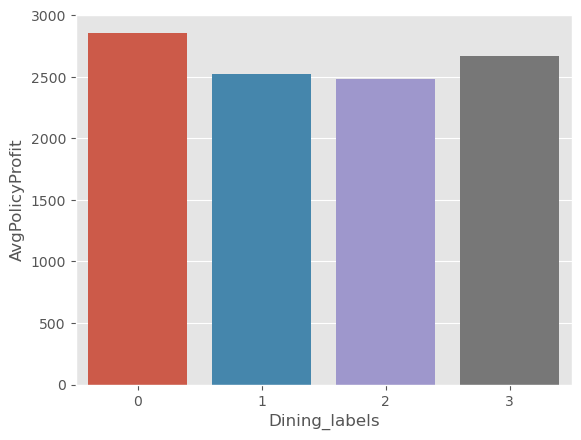

In [194]:
sns.barplot(x=label_name, y='AvgPolicyProfit', data = df_clusters_claims)

### Total Profit per Cluster

<Axes: xlabel='Dining_labels', ylabel='TotalPolicyProfits'>

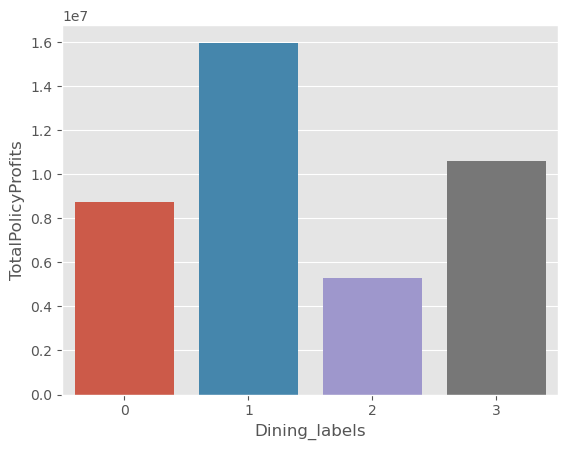

In [195]:
sns.barplot(x=label_name, y='TotalPolicyProfits', data = df_clusters_claims)

### Total Claims Per Cluster

<Axes: xlabel='Dining_labels', ylabel='ClaimTotal'>

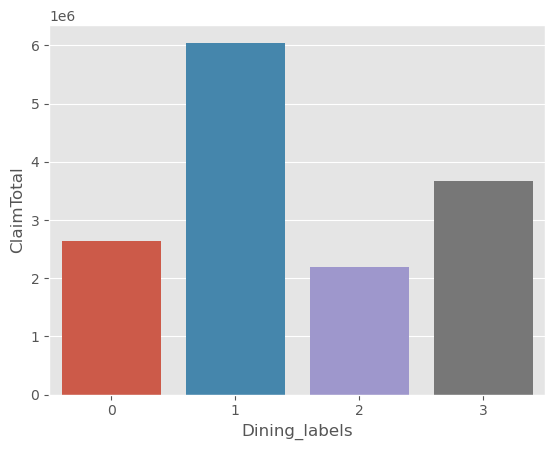

In [196]:
sns.barplot(x=label_name, y='ClaimTotal', data = df_clusters_claims)

################################################################################################################################

## Section 6: Modeling for Predicting MQuotedTotalPayment

In this section of the notebook, I built regression models to predict the MQuotedTotalPayment value given the Abilitech and existing policy data. 

#### In this part of the code I prepped the AP3_Footwear and Dining models and joined them with the MasterQuote data. 

#### The model finalized with the name df_AP3_Quote, which then had column conversions and one hot encoding done in order to make all categorical data into numerical data. The null values were then dropped, and the model values were decreased to 5000 for the sake of computation power. 

#### My rationale here is that a combination of consumer Footwear, Dining, Insurance Quote requests and Policy information may provide enough variability to give the model an accurate picture of the MQuotedTotalPayment price. 

#### This was not my only model. I tried doing this with only demographic information from df_Demo, as well as with the df_AP3_Retail and with just the df_AP3_Footwear dataframes before starting this and they were all less successful. 

### Prep the model

In [197]:
#df_AP3_Footwear_Final = df_AP3_Footwear_Final.drop(['AbilitecContactID'], axis=1)

df_AP3_DiningFootwear = pd.concat([df_AP3_Footwear_Final, df_AP3_Dining_Final], axis=1, join='inner')
df_AP3_DiningFootwear = df_AP3_DiningFootwear.drop_duplicates()
df_AP3_DiningFootwear = pd.concat([df_AP3_ID, df_AP3_DiningFootwear], axis=1, join='inner')
df_AP3_DiningFootwear = df_AP3_DiningFootwear.drop_duplicates()
df_AP3_Quote = pd.merge(df_MasterQuote, df_AP3_DiningFootwear, on='AbilitecContactID', how='left')
df_AP3_Quote = df_AP3_Quote.dropna()
df_AP3_Quote = df_AP3_Quote.drop(['Unnamed: 0'], axis=1)

### Converting Columns

In [198]:
df_AP3_Quote.loc[:,'BiFcCoverageInd'] = df_AP3_Quote.loc[:,'BiFcCoverageInd'].map({'NOBI NOFC': 0, 'NOBI FC': 1, 'BI NOFC': 2, 'BI FC': 3})
df_AP3_Quote.loc[:,'CoverageTypeDescription'] = df_AP3_Quote.loc[:,'CoverageTypeDescription'].map({'Bond': 0, 'Liability Only': 1, 'Full Coverage': 2, 'BI FC': 3})
df_AP3_Quote.loc[:,'NamedInsuredMaritalStatus'] = df_AP3_Quote.loc[:,'NamedInsuredMaritalStatus'].map(
    {'Single': 0, 'Married': 1, 'Divorced': 2, 'Separated': 3, 'Civil Union': 4, 'Widowed': 5, 'Domestic Partner': 6}
)
df_AP3_Quote.loc[:,'DsDwellingDescription'] = df_AP3_Quote.loc[:,'DsDwellingDescription'].map({'No Dwelling Discount': 0, 'Homeowner-No Proof Required': 1, 'Homeowner-Needs Proof(hn)': 2})
df_AP3_Quote.loc[:,'DsMultiCarDescription'] = df_AP3_Quote.loc[:,'DsMultiCarDescription'].map({'No Multi-Car Discount': 0, 'Multi-Car Discount': 1})
df_AP3_Quote = df_AP3_Quote.drop(['AbilitecContactID'], axis=1)

In [199]:
object_cols = df_AP3_Quote.select_dtypes(include=['object'])
for column in object_cols:
    # Ensure the column data can be converted to integers
    df_AP3_Quote[column] = pd.to_numeric(df_AP3_Quote[column], errors='coerce').fillna(0).astype(int)

### OneHotEncode the Categorical Data

In [200]:
encoder = OneHotEncoder(sparse_output=False)

### GaragingState

In [201]:
colName = 'GaragingState'
df_AP3_Quote_Encoded = encoder.fit_transform(df_AP3_Quote[[colName]])
df_AP3_Quote_Temp = pd.DataFrame(df_AP3_Quote_Encoded, columns=encoder.get_feature_names_out([colName]))
df_AP3_Quote = pd.concat([df_AP3_Quote.drop(colName, axis=1),df_AP3_Quote_Temp], axis=1)
df_AP3_Quote = df_AP3_Quote.dropna()

### Policy State Code

In [202]:
colName = 'PolicyStateCode'

df_AP3_Quote_Encoded = encoder.fit_transform(df_AP3_Quote[[colName]])

df_AP3_Quote_Temp = pd.DataFrame(df_AP3_Quote_Encoded, columns=encoder.get_feature_names_out([colName]))

df_AP3_Quote = pd.concat([df_AP3_Quote.drop(colName, axis=1),df_AP3_Quote_Temp], axis=1)

df_AP3_Quote = df_AP3_Quote.dropna()

In [203]:
df_AP3_Quote = df_AP3_Quote.drop(
    ['QuoteNumber','PolicyNumber','QuoteInitiatedTime','TermEffectiveDate',
     'TermExpirationDate','AbilitecHouseholdID'], axis=1)


### Run the Model

In [204]:

X = df_AP3_Quote.drop(['MQuotedTotalPayment'], axis =1 )
X = X[:5000]
y = df_AP3_Quote['MQuotedTotalPayment']
y = y[:5000]

In [205]:
# Scale the X variable and name it X_reg_scaled
scaler = StandardScaler()
X.columns = X.columns.astype(str)
X_reg_scaled = scaler.fit_transform(X)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled,y, test_size=0.3, random_state=42)

In [207]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
# Predictions
y_pred = model.predict(X_test)


### Coefficients

In [208]:
names = X.columns
multreg_coef = model.fit(X_train, y_train).coef_
df_multreg = pd.DataFrame([multreg_coef])
df_multreg.columns = names
df_multreg = df_multreg.T
df_multreg = df_multreg.rename(columns = {0: 'corr_coeff'})
pd.set_option('display.max_rows', 200)
print(df_multreg)

                                                      corr_coeff
BiFcCoverageInd                                     4.843122e+02
CoverageTypeDescription                             2.160484e+02
DriversActive                                       9.717545e+01
NamedInsuredMaritalStatus                          -1.813087e+01
PolicyTerm                                          3.447409e+02
DsDwellingDescription                              -3.342191e+01
DsMultiCarDescription                               8.554328e+01
NamedInsuredAge                                    -1.468441e+02
NamedInsuredDriverPoints                            2.517015e+02
DriverNumber                                        4.455284e+01
DriverCount                                         3.022546e+00
GotPolicy                                          -1.221495e+02
AP003732_Influenced_to_Purchase_Athletic_Shoe_S... -9.008590e+01
AP003733_Influenced_to_Purchase_Discount_Mass_M...  5.118036e+00
AP003734_Influenced_to_Pu

### Visualize the Plot

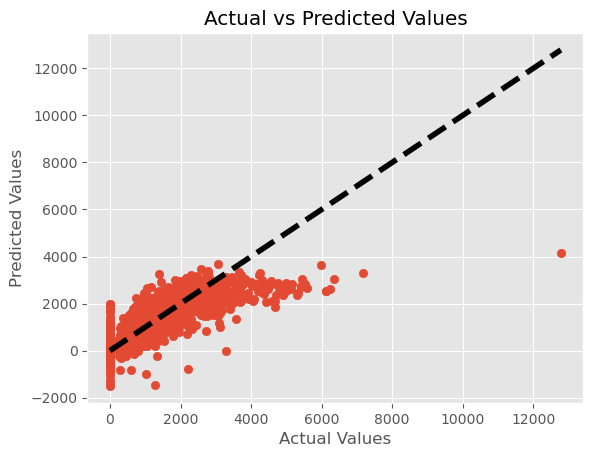

In [209]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

In [210]:
from sklearn.model_selection import cross_val_score
print(f"Score: {model.score(X_test, y_test)}")

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R^2 scores: {scores}")
print(f"Average R^2 score: {np.mean(scores)}")

Score: 0.5445534411092492
Cross-validated R^2 scores: [0.47043453 0.45357421 0.52981165 0.44320371 0.51013582]
Average R^2 score: 0.4814319820380562


### Evaluate with Additional Metrics

In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 500.12937506456734, MSE: 536087.2586180381, RMSE: 732.1797993785667


### Summary
This model has some predictive power, but is in need of some improvements. It may be overfit to the training data, and another set of training data may not have the same results. Nevertheless, this model was built using linear regression and uses many of the Abilitech Data points to try and predict the quoted values for our customers. This could be very useful in pricing strategies that go alongside the consumer information we learned earlier in the clustering section. Since the model appears to need some improvement, I am going to attempt some regularization methods to see if it improves. 

### Let's try a Lasso so we can optimize for all the possibly useless columns

C:\Users\j8k-o\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.573e+06, tolerance: 4.636e+05
  model = cd_fast.enet_coordinate_descent(


iteration 1 done
iteration 2 done
iteration 5 done
iteration 7 done
iteration 10 done


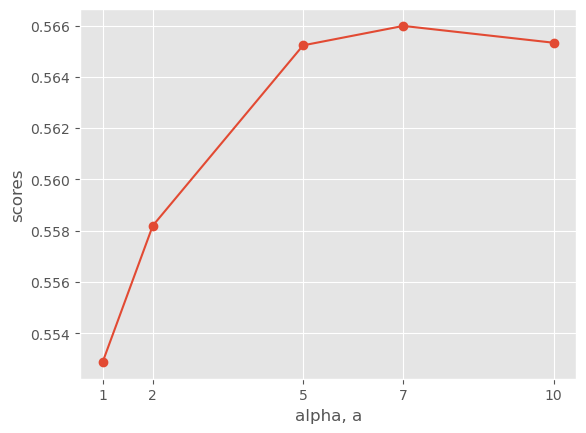

In [212]:
# Run a function to find the best alpha
alphas = [1,2,5,7,10] #approximate the alpha value
scores = []

for a in alphas: 
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

0.5659859900467157


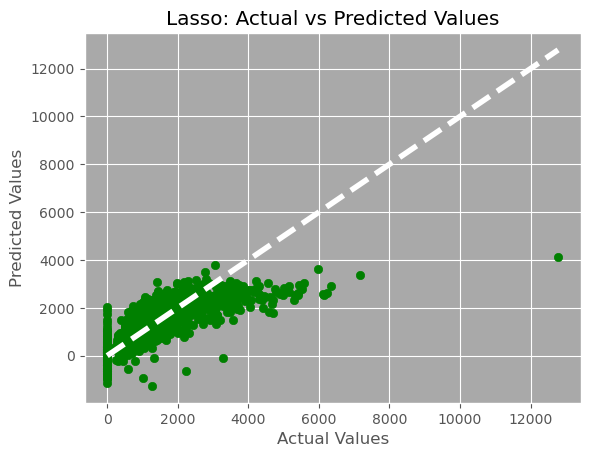

In [213]:
lasso = Lasso(alpha = 7)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
print(lasso.score(X_test, y_test))
plt.scatter(y_test, y_lasso_pred, color = 'green')
plt.gca().set_facecolor('darkgray')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=4)
plt.show()

### Summary of Lasso
- Using an optimized alpha value that is calculated in the inertia model, I modelled a Lasso regression and it improved the performance of the model by about 2%. This is an example of some of the improvements that are possible given the correct data and techniques. I also tried Ridge regression, but it consistently performed much worse on this dataset for some reason, so I left it out of this already extensive notebook. 

### Random Forest

### Now I am going to attempt  to use a never before used model: RandomForestRegressor. 

In [214]:
# Run an inertia model to identify the best number of depths for the classifier
from sklearn.ensemble import RandomForestRegressor

# The plot 

n_estimators_range = range(110,150,10)  # Range of n_estimators 
max_depth_range = range(6,11)  # Range of max_depth 

# Initialize variables to store best parameters and score
best_score = 0
best_params = {'n_estimators': None, 'max_depth': None}

# Initialize lists to store scores for each combination
scores = []

# Loop over each combination of n_estimators and max_depth
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Create and train the Random Forest Classifier
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        
        # Calculate the score on the test set
        score = rf.score(X_test, y_test)
        
        # Store the score and parameters
        scores.append((n_estimators, max_depth, score))
        
        # Update the best score and parameters if score beats the best one so far
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth
        
        #prints the progress, turned off for the sake of visuals
        #print("n_estimators: {}, max_depth: {}, score: {:.4f}".format(n_estimators, max_depth, score))
    print("n_estimator {} is done".format(n_estimators))
    
# Extracts n_estimators, max_depth, and scores for visual
n_estimators_values = [s[0] for s in scores]
max_depth_values = [s[1] for s in scores]
scores_values = [s[2] for s in scores]

# Plot the scores
plt.figure(figsize=(10, 6))
# Set the scatter plot to show max_depth on the x, n_estimators on the y
# set the colors as score_values, and the color gradient to 'magma'
plt.scatter(max_depth_values, n_estimators_values, c=scores_values, cmap='magma', marker='o')
plt.colorbar(label='Accuracy') # created a gradient bar to measure the accuracy (White is best purple worst)
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Accuracy max_depth and n_estimators')
plt.grid(True) # Set it as a grid
plt.show()

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


KeyboardInterrupt



In [215]:
rf = RandomForestRegressor(
        n_estimators=best_params['n_estimators']
        , max_depth = best_params['max_depth']
        , random_state=42
        , min_samples_split=4
        , min_samples_leaf=3
    )

rf = rf.fit(X_train, y_train)
# Print the scores 
score = rf.score(X_test, y_test)
print(score)
# Predict the model 
enhance_pred = rf.predict(X_test)
enhance_pred = pd.DataFrame(enhance_pred)
# Rename the column Predict_Enhance
enhance_pred = enhance_pred.rename(columns = {0: 'Predict_Enhance'})


KeyboardInterrupt



In [ ]:

plt.scatter(y_test, enhance_pred, color = 'green')
plt.gca().set_facecolor('darkgray')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=4)
plt.show()

In [ ]:
# Discover the most important features in the Random Forest Classifier
fi = pd.DataFrame(rf.feature_importances_)
columns = pd.DataFrame(list(X.columns))
features = pd.concat([columns, fi], axis=1)
features.columns = ['Feature','Importance']
features.sort_values('Importance', ascending=False)

## Summary

In this section, I began by writing a linear regression algorithm that combined the df_MasterQuote and df_Abilitech data to predict the Quote price given to a customer when they are applying for insurance. The linear regression model provided decent accuracy at 54%, and the introduction of a lasso regression algorithm with an optimized alpha value gave it an accuracy of 56%. I then ran a Random Forest Regressor with optimized parameters and was able to increase the model score to 64% with an indication of the most important factors which were:  

    - CoverageTypeDescription	0.327712
    - PolicyTerm	0.124262
	- NamedInsuredDriverPoints	0.093372
	- NamedInsuredAge	0.082916
	- BiFcCoverageInd	0.061168
	- DriversActive	0.025440
    
    
This model serves as a good starting point for The General to begin predicting the Quotes that they ill provide thier newly identified customers. 

###############################################################################################################################

## Modeling for Policy Risk 

This is a risk analysis that combines data from two sources (df_TheGeneral and df_AP3) and builds a predictive model to determine the likelihood of a claim being filed (HasClaim). This can be extremely useful in cases of underwriting. 

In [ ]:
# Identify target variable that gives an indication of risk using df_TheGeneral and the Abilitech Data
# Claim Count
# Total Paid
# At Fault Description
df_AP3 = df_AP3.dropna()
df_TheGeneral_RiskAnalysis = pd.merge(df_TheGeneral, df_AP3, on='AbilitecContactID',how='left')
#df_TheGeneral_RiskAnalysis = df_TheGeneral
# Encode Categorical variables

#df_TheGeneral_RiskAnalysis =df_TheGeneral_RiskAnalysis.dropna()
# Build a AveragePaidPerClaim, ClaimFrequency
df_TheGeneral_RiskAnalysis = df_TheGeneral_RiskAnalysis.drop([], axis=1)
# Drop irrelevant features

# Features like DaysSincePolicyStart
df_TheGeneral_RiskAnalysis.drop(columns=['Unnamed: 0'], inplace=True)
df_TheGeneral_RiskAnalysis['DateOfLoss'] = pd.to_datetime(df_TheGeneral_RiskAnalysis['DateOfLoss'])
df_TheGeneral_RiskAnalysis['TermEffectiveDate'] = pd.to_datetime(df_TheGeneral_RiskAnalysis['TermEffectiveDate'])
df_TheGeneral_RiskAnalysis['HasClaim'] = df_TheGeneral_RiskAnalysis['ClaimCount'].apply(lambda x: 0 if pd.isna(x) else 1)
df_TheGeneral_RiskAnalysis.drop(columns=['PolicyNumber', 'DriverNumber', 'AbilitecContactID', 'AbilitecHouseholdID'], inplace=True)
df_TheGeneral_RiskAnalysis['DaysBetween'] = (df_TheGeneral_RiskAnalysis['DateOfLoss'] - df_TheGeneral_RiskAnalysis['TermEffectiveDate']).dt.days
df_TheGeneral_RiskAnalysis['LessThan30Days'] = df_TheGeneral_RiskAnalysis['DaysBetween'] < 30
df_TheGeneral_RiskAnalysis.drop(columns=['DateOfLoss', 'TermEffectiveDate'], inplace=True)


df_TheGeneral_RiskAnalysis
df_TheGeneral_RiskAnalysis['ClaimCount'] = df_TheGeneral_RiskAnalysis['ClaimCount'].fillna(0)
df_TheGeneral_RiskAnalysis['TotalPaid'] = df_TheGeneral_RiskAnalysis['TotalPaid'].fillna(0)
df_TheGeneral_RiskAnalysis['FirstDaysToClaim'] = df_TheGeneral_RiskAnalysis['FirstDaysToClaim'].fillna(0)
df_TheGeneral_RiskAnalysis['FirstHoursToClaim']  = df_TheGeneral_RiskAnalysis['FirstHoursToClaim'].fillna(0)
df_TheGeneral_RiskAnalysis['SumClaimTransPaidLoss'] = df_TheGeneral_RiskAnalysis['SumClaimTransPaidLoss'].fillna(0)
df_TheGeneral_RiskAnalysis['ClaimTransCount'] = df_TheGeneral_RiskAnalysis['ClaimTransCount'].fillna(0)
df_TheGeneral_RiskAnalysis['DaysBetween'] = df_TheGeneral_RiskAnalysis['DaysBetween'].fillna(0)
df_TheGeneral_RiskAnalysis['LessThan30Days'] = df_TheGeneral_RiskAnalysis['LessThan30Days'].fillna(0)


df_TheGeneral_RiskAnalysis['LessThan30Days'].value_counts()

df_TheGeneral_RiskAnalysis = df_TheGeneral_RiskAnalysis.dropna()

# Model the risk 
X = df_TheGeneral_RiskAnalysis.drop(columns=['DriverCount','ACX_ZIPCODE','HasClaim','ACX_ZIP4','HasClaim','ClaimCount','FirstHoursToClaim','FirstDaysToClaim','ClaimTransCount','SumClaimTransPaidLoss','LessThan30Days','DaysBetween','TotalPaid'])
y = df_TheGeneral_RiskAnalysis['HasClaim']

X.info()


# Model a yes or no type of underwriting decision using a predictive risk score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LogisticRegression(max_iter=10000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

In [ ]:
score = model.score(X_test_scaled, y_test)

In [ ]:
print(score)

In [ ]:
# Print the confusion matrix and classification report
dt_preds = model.predict(X_test)
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

In [ ]:
coefficients = model.coef_[0]
coef_df = pd.DataFrame({'Feature: ': X_train.columns, 'Coef': coefficients})
coef_df['Magnitude'] = coef_df['Coef'].abs()
sorted_coef_df = coef_df.sort_values(by='Magnitude', ascending=False)
sorted_coef_df[:15]

### What does it mean? 

Interestingly, this model points to a few consumer behaviors that may be associated with higher and lower risk measurements. Using the magnitude model, I was able to return the absolute values next to the raw numbers to give me a sense of what has a positive and negative correlation with the potential for a customer to file a claim. The first two features, dining at a coffee or bagel shop, and Purchasing Men's Athletic footwear, are instances of negative correlation with filing a claim. Purchasing a women's sandal footwear, eating at a Grill Buffett and BBQ restaurant are correlated with filing a claim. This is a really interesting exercise, and could provide great insights into consumer behavior's correlation with their behavior as insurance customers. 


## Final Summary

This project notebook does not contain all of the work that was performed to get it to the state it currently is in. I have built and rebuilt many iterations of this over the last week trying to find something that made sense and worked for the assignment at hand. I believe in this case I have found something useful. The process for getting to this point was eye opening and a growing experience for me as a student of data analytics. 

I started off by analyzing all of the columns in the Abilitech data source and tried to find some commonalities amongst them. I did not know how it was possible to tie them to the insurance data, other than via the Abilitech Contact ID. After a lot of consideration, I realized that this was truly a 'figure it out' kind of assignment and began to run analysis on random slices of the Abilitech data. I then started to merge them with the Demographic, Policy, and Claim data in order to generate more insights. It was then that I realized that I needed to go back and clean those files in order to make them useful, and in their current iteration, they likely aren't as useful as they could be. The choice between One Hot Encoding and column conversions was difficult and I think it affected the performance of the models in negative ways when too many columns were created or when the column conversions did not map to a linear relationship of 0 to n that the models could understand. 

As far as the model building and the analysis, I started slowly with the KMeans clustering and began classifying the resulting rows of the clusters into ways that made sense. The inertia models were not obvious, but I eventually settled on 5 for the Retail and Footwear sections. I discovered that these two slices of the Abilitech data gave me the same breakdown of customers, and it was really interesting to see that play out in the analysis. Seeing that there was immediately useful information that could be uncovered from a huge tables of floating point numbers was something new to me. For that reason, I have come to the conclusion that the Abilitech data is worth the cost. Finding ways to map its contents onto the customers purchasing behavior has given us insight into the types of customers, marketing venues, and behaviors we want to associate with in order to lessen our exposure to risk and increase The General's profitability. 

The next section was concerned with modeling a regression function that could accurately predict the MQuotedTotalPayment given the Abilitech information and past quote information. 

First, I attempted a multiple regression algorithm that had a score of 0.5445534411092492. Then I added the Lasso regression to the model and got the accuracy up to 0.5659859900467157 from an optimized model. As I mentioned above, I ran these two methods and Ridge regression a few times before this and was receiving model scores of .002 to .14. It was not until I began cleaning the data and properly merging it that a useful model emerged. I then read about the Random Forest Regressor model, which is the regression version of the Random Forest classifier found in the sklearn package. After running an optimization on the n_estimators and max_depth, I was able to increase the model's accuracy to 0.6448248719964669. I considered this a win, even though I knew it could be improved. The coefficients indicate that the policy type and degree of coverage are the weightiest part of the calcuation, and that definitely makes sense. 

The last part of this project was to develop a was to model risk. I must admit I was intimidated by this project as I have very litle knowledge of insurance outside of what I have read from Warren Buffett and GEICO. In this section, I built a model that combined TheGeneral dataset with the entire Abilitech dataset and ran a logistic regression algorithm on two new columns: 'HasClaim' and 'LessThan30Days'. Both models were very accurate. I thought for sure I had broken some rules and went back to check. I even removed everything but the Abilitech data, but it still had a 78.78% accuracy for "HasClaim" and a 96% accuracy for "LessThan30Days". It took me a while to understand that this was likely due to the way that a binary classification model simplifies the process for the algorithm. At worst it is 50%, and any other information pushes that number up. The most satisfactory part of this was the final coefficient table, that showed the magnitude of the Abilitech factors. These indicated that the data had some useful information about what behaviors could be associated with high risk and which indicate a decrease in risk. This was exactly what I was looking for. For The General, this serves as proof that the data and the techniques used here can be used to improve their understanding of their customers and their business, and proved to me the efficacy of predictive analytics for solving business problems for years to come. 
